In [19]:
import math
import numpy as np

In [20]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [21]:
import initdatuneq

In [22]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=50
ecc0=0.0 #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= 0. #math.pi/6. #math.pi/6.
mass0_1=1.0
mass0_2=1.0
initdatequneq=initdatuneq.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0_1,mass0_2)
print(initdatequneq)

angle 0.0
0.0
(array([3.14159265, 0.        ]), 0.0, 50, 0.0, array([1., 1.]))


In [23]:
import getxyuvtwouneq_apper #unequal mass version

In [24]:
useperihelion=True

In [25]:
xyuvaequneq=getxyuvtwouneq_apper.getxyuvequneq(initdatequneq,useperihelion)
print(xyuvaequneq)
masses,xvec,avec=xyuvaequneq

initdat 50 [3.14159265 0.        ] 0.0 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
circle
r0 100.0
(array([1., 1.]), array([[-25. ,   0. ,   0. ,  -0. ,  -0.2,   0. ],
       [ 25. ,   0. ,   0. ,  -0. ,   0.2,   0. ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [26]:
import RK4implicit

In [27]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [28]:
import OrbitDiffEqAdaptive

In [29]:
masses, xvec,avec=xyuvaequneq
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-25.    0.    0.   -0.   -0.2   0. ]
 [ 25.    0.    0.   -0.    0.2   0. ]] 0.0
[1. 1.] [[-25.    0.    0.   -0.   -0.2   0. ]
 [ 25.    0.    0.   -0.    0.2   0. ]] 0.0


In [30]:
print(xyuvaequneq)

(array([1., 1.]), array([[-25. ,   0. ,   0. ,  -0. ,  -0.2,   0. ],
       [ 25. ,   0. ,   0. ,  -0. ,   0.2,   0. ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [31]:
import timestepAdaptive

In [32]:
import parabfns

In [33]:
import hyperbfns

In [34]:
numsteps=10000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaequneq,outputevery,delta)

0.01
[-5.99999979e-08  2.00000000e-03  0.00000000e+00]
[3.59999974e-15 3.99999999e-06 0.00000000e+00]
3.999999988666666e-06
0.0019999999971666666
75.00000010625 False
0.02648547861682468
[-5.26830224e-07  5.29709562e-03  0.00000000e+00]
[2.77550085e-13 2.80592220e-05 0.00000000e+00]
2.805922224359679e-05
0.005297095642292745
28.317404504154922 False
0.05498746468055191
[-2.61666931e-06  1.09974917e-02  0.00000000e+00]
[6.84695828e-12 1.20944823e-04 0.00000000e+00]
0.00012094482985132942
0.010997491980052971
13.639473461046116 False
0.09510549422118246
[-8.90685126e-06  1.90210904e-02  0.00000000e+00]
[7.93319993e-11 3.61801880e-04 0.00000000e+00]
0.00036180195888264324
0.019021092473426527
7.885982375069042 False
0.14343728845642748
[-2.30493731e-05  2.86874203e-02  0.00000000e+00]
[5.31273602e-10 8.22968081e-04 0.00000000e+00]
0.0008229686123883861
0.028687429518665247
5.228771016322801 False
0.19521108798516199
[-4.86329975e-05  3.90420954e-02  0.00000000e+00]
[2.36516844e-09 1.52428

0.5001905779827072
[-0.01045185  0.09774939  0.        ]
[0.00010924 0.00955494 0.        ]
0.009664183630535157
0.09830657979268304
1.5258388636481126 False
0.5003284333326928
[-0.0105335   0.09773993  0.        ]
[0.00011095 0.00955309 0.        ]
0.009664048040337932
0.09830589016095594
1.5258495676546486 False
0.5004672043871494
[-0.01061491  0.09773043  0.        ]
[0.00011268 0.00955124 0.        ]
0.00966391371889136
0.09830520697751141
1.525860171723299 False
0.5006068836837658
[-0.01069611  0.0977209   0.        ]
[0.00011441 0.00954937 0.        ]
0.009663780667513805
0.09830453024918946
1.525870675743723 False
0.5007474637471622
[-0.01077707  0.09771133  0.        ]
[0.00011615 0.0095475  0.        ]
0.009663648887354702
0.0983038599819697
1.5258810796189701 False
0.5008889370898338
[-0.0108578   0.09770172  0.        ]
[0.00011789 0.00954563 0.        ]
0.009663518379392222
0.09830319618095956
1.5258913832656607 False
0.5010312962131118
[-0.0109383   0.09769208  0.        ]

1.5264617574121018 False
0.5210219722018176
[-0.01848222  0.09651268  0.        ]
[0.00034159 0.0093147  0.        ]
0.009656289572702394
0.09826642138951837
1.5264624261161892 False
0.521218806647632
[-0.01853549  0.09650242  0.        ]
[0.00034356 0.00931272 0.        ]
0.009656281840950421
0.09826638204874759
1.5264630372326988 False
0.5214157676415629
[-0.01858855  0.09649218  0.        ]
[0.00034553 0.00931074 0.        ]
0.009656274831154665
0.09826634638142738
1.5264635912865325 False
0.5216128503960761
[-0.01864138  0.09648195  0.        ]
[0.0003475  0.00930877 0.        ]
0.00965626853668892
0.0982663143538462
1.5264640888012395 False
0.5218100501610841
[-0.01869399  0.09647175  0.        ]
[0.00034947 0.0093068  0.        ]
0.009656262950940443
0.09826628593236056
1.5264645302993256 False
0.5220073622239301
[-0.01874639  0.09646155  0.        ]
[0.00035143 0.00930483 0.        ]
0.0096562580673148
0.09826626108341968
1.5264649163018706 False
0.5222047819093398
[-0.01879856 

0.5444898697650425
[-0.023493    0.09543037  0.        ]
[0.00055192 0.00910695 0.        ]
0.00965887575078289
0.09827957952078799
1.5262580561638663 False
0.5446773375226193
[-0.02352474  0.09542275  0.        ]
[0.00055341 0.0091055  0.        ]
0.009658915261143696
0.09827978053060403
1.5262549345365137 False
0.5448645912245869
[-0.02355634  0.09541517  0.        ]
[0.0005549  0.00910405 0.        ]
0.009658954911290735
0.09827998225117227
1.5262518018842115 False
0.5450516296209578
[-0.0235878  0.0954076  0.       ]
[0.00055638 0.00910261 0.        ]
0.009658994698355742
0.09828018466789601
1.5262486584337756 False
0.545238451480883
[-0.02361913  0.09540006  0.        ]
[0.00055786 0.00910117 0.        ]
0.00965903461950198
0.09828038776633911
1.5262455044095253 False
0.5454250555924681
[-0.02365032  0.09539254  0.        ]
[0.00055934 0.00909974 0.        ]
0.009659074671917496
0.09828059153219162
1.526242340033818 False
0.5456114407626366
[-0.02368138  0.09538505  0.        ]
[0

[-0.02643713  0.09468372  0.        ]
[0.00069892 0.00896501 0.        ]
0.00966392779267886
0.0983052785595914
1.5258590606512743 False
0.5650779937944653
[-0.02645635  0.09467857  0.        ]
[0.00069994 0.00896403 0.        ]
0.009663970341197979
0.0983054949694979
1.525855701622191 False
0.565235291846742
[-0.02647549  0.09467344  0.        ]
[0.00070095 0.00896306 0.        ]
0.009664012843329899
0.09830571114299463
1.5258523462773317 False
0.5653923228615626
[-0.02649456  0.09466834  0.        ]
[0.00070196 0.00896209 0.        ]
0.009664055298428125
0.09830592707679495
1.5258489946676612 False
0.5655490869374848
[-0.02651355  0.09466324  0.        ]
[0.00070297 0.00896113 0.        ]
0.009664097705859359
0.09830614276767936
1.5258456468431014 False
0.5657055841784506
[-0.02653246  0.09465817  0.        ]
[0.00070397 0.00896017 0.        ]
0.009664140064995377
0.09830635821245427
1.5258423028531714 False
0.5658618146937542
[-0.02655129  0.09465311  0.        ]
[0.00070497 0.00895

0.5822352297997982
[-0.02829824  0.09416935  0.        ]
[0.00080079 0.00886787 0.        ]
0.00966865582675674
0.09832932333112407
1.5254859376472558 False
0.5823620172172572
[-0.02831016  0.09416594  0.        ]
[0.00080147 0.00886722 0.        ]
0.00966869016708315
0.09832949794991913
1.5254832286075286 False
0.582488573640019
[-0.02832204  0.09416255  0.        ]
[0.00080214 0.00886659 0.        ]
0.00966872443223839
0.09832967218616356
1.5254805255122899 False
0.5826148994726233
[-0.02833388  0.09415917  0.        ]
[0.00080281 0.00886595 0.        ]
0.009668758622241333
0.0983298460399554
1.5254778283599562 False
0.5827409951202255
[-0.02834567  0.0941558   0.        ]
[0.00080348 0.00886532 0.        ]
0.009668792737115251
0.09833001951141498
1.525475137148597 False
0.5828668609885606
[-0.02835742  0.09415245  0.        ]
[0.00080414 0.00886468 0.        ]
0.009668826776883986
0.09833019260066557
1.5254724518762377 False
0.5829924974839379
[-0.02836913  0.0941491   0.        ]
[

1.52520380121166 False
0.5959160609923541
[-0.02946263  0.09383077  0.        ]
[0.00086805 0.00880421 0.        ]
0.009672259181864346
0.09834764451609579
1.5252017548366466 False
0.5960180662574543
[-0.02947044  0.09382845  0.        ]
[0.00086851 0.00880378 0.        ]
0.009672285073064276
0.09834777614701959
1.525199713471566 False
0.5961198895178849
[-0.02947822  0.09382615  0.        ]
[0.00086897 0.00880335 0.        ]
0.009672310900968026
0.09834790745596993
1.5251976771051745 False
0.5962215311626526
[-0.02948598  0.09382385  0.        ]
[0.00086942 0.00880291 0.        ]
0.009672336665709847
0.09834803844363062
1.525195645726827 False
0.5963229915802245
[-0.02949371  0.09382155  0.        ]
[0.00086988 0.00880248 0.        ]
0.009672362367428234
0.09834816911070705
1.5251936193255444 False
0.5964242711584918
[-0.02950141  0.09381927  0.        ]
[0.00087033 0.00880205 0.        ]
0.009672388006265069
0.09834829945792184
1.525191597890081 False
0.5965253702847425
[-0.02950909 

0.6067121595210035
[-0.03022437  0.09360226  0.        ]
[0.00091351 0.00876138 0.        ]
0.009674895026194421
0.09836104425124013
1.52499397644519 False
0.6067953450884139
[-0.03022976  0.09360062  0.        ]
[0.00091384 0.00876108 0.        ]
0.00967491444922786
0.09836114298455391
1.524992445681067 False
0.6068783897675395
[-0.03023512  0.09359899  0.        ]
[0.00091416 0.00876077 0.        ]
0.009674933824883353
0.09836124147693212
1.5249909186554778 False
0.6069612938692565
[-0.03024048  0.09359737  0.        ]
[0.00091449 0.00876047 0.        ]
0.009674953153288889
0.0983613397290261
1.5249893953583016 False
0.6070440577037357
[-0.03024581  0.09359574  0.        ]
[0.00091481 0.00876016 0.        ]
0.009674972434570227
0.09836143774147584
1.5249878757795938 False
0.6071266815804588
[-0.03025113  0.09359413  0.        ]
[0.00091513 0.00875986 0.        ]
0.009674991668858705
0.09836153551494967
1.5249863599089704 False
0.6072091658081725
[-0.03025643  0.09359252  0.        ]


1.5248354890400588 False
0.6157702243604697
[-0.03076992  0.09343518  0.        ]
[0.00094679 0.00873013 0.        ]
0.00967692089839874
0.09837134185523108
1.5248343386506673 False
0.6158385341753162
[-0.03077374  0.093434    0.        ]
[0.00094702 0.00872991 0.        ]
0.009676935465420146
0.09837141589618473
1.5248331909576351 False
0.6159067356747611
[-0.03077754  0.09343283  0.        ]
[0.00094726 0.00872969 0.        ]
0.009676949998348075
0.09837148976379323
1.5248320459533107 False
0.6159748290925878
[-0.03078133  0.09343165  0.        ]
[0.00094749 0.00872947 0.        ]
0.00967696449727947
0.09837156345854971
1.5248309036300383 False
0.6160428146619843
[-0.03078511  0.09343049  0.        ]
[0.00094772 0.00872926 0.        ]
0.009676978962300825
0.09837163698089417
1.524829763980985 False
0.6161106926156247
[-0.03078888  0.09342932  0.        ]
[0.00094796 0.00872904 0.        ]
0.009676993393507064
0.0983717103313095
1.5248286269986544 False
0.6161784631856018
[-0.03079264

0.6233120279612445
[-0.03116506  0.09331238  0.        ]
[0.00097126 0.0087072  0.        ]
0.009678461028170035
0.09837916968632147
1.5247130106735982 False
0.6233687737539634
[-0.03116784  0.09331151  0.        ]
[0.00097143 0.00870704 0.        ]
0.009678472083575595
0.09837922587404109
1.5247121398581758 False
0.6234254356978749
[-0.03117061  0.09331064  0.        ]
[0.00097161 0.00870688 0.        ]
0.009678483114548797
0.0983792819375543
1.5247112709687356 False
0.6234820139660175
[-0.03117338  0.09330978  0.        ]
[0.00097178 0.00870671 0.        ]
0.009678494121153267
0.0983793378771847
1.5247104040002564 False
0.6235385087310216
[-0.03117614  0.09330892  0.        ]
[0.00097195 0.00870655 0.        ]
0.009678505103456
0.09837939369327298
1.5247095389474508 False
0.6235949201650819
[-0.03117889  0.09330805  0.        ]
[0.00097212 0.00870639 0.        ]
0.009678516061522032
0.09837944938614991
1.5247086758051864 False
0.623651248439973
[-0.03118163  0.0933072   0.        ]
[

0.6296159249895015
[-0.03145708  0.09322066  0.        ]
[0.00098955 0.00869009 0.        ]
0.009679638862755954
0.09838515570326631
1.5246202430416047 False
0.6296636667124961
[-0.03145916  0.09322     0.        ]
[0.00098968 0.00868997 0.        ]
0.009679647390608602
0.09838519904237934
1.52461957143968 False
0.6297113427079166
[-0.03146124  0.09321934  0.        ]
[0.00098981 0.00868985 0.        ]
0.009679655900766885
0.09838524229154942
1.5246189012321405 False
0.6297589531042458
[-0.03146332  0.09321869  0.        ]
[0.00098994 0.00868972 0.        ]
0.009679664393277805
0.09838528545101552
1.5246182324152795 False
0.6298064980296479
[-0.03146539  0.09321804  0.        ]
[0.00099007 0.0086896  0.        ]
0.009679672868185746
0.0983853285210033
1.5246175649855962 False
0.6298539776119896
[-0.03146745  0.09321738  0.        ]
[0.0009902  0.00868948 0.        ]
0.009679681325532307
0.09838537150172431
1.524616898939809 False
0.629901391978862
[-0.03146952  0.09321673  0.        ]


0.09838980866429514
1.5245481420926248 False
0.634990647365236
[-0.0316801   0.09315005  0.        ]
[0.00100363 0.00867693 0.        ]
0.009680561134076074
0.09838984263670754
1.5245476156909474 False
0.6350312337674658
[-0.0316817   0.09314955  0.        ]
[0.00100373 0.00867684 0.        ]
0.00968056780615121
0.0983898765430225
1.5245470903138105 False
0.6350717680505159
[-0.03168329  0.09314904  0.        ]
[0.00100383 0.00867674 0.        ]
0.009680574465254783
0.09838991038340661
1.524546565958631 False
0.6351122503104903
[-0.03168488  0.09314853  0.        ]
[0.00100393 0.00867665 0.        ]
0.009680581111412888
0.09838994415799253
1.524546042623351 False
0.6351526806433193
[-0.03168647  0.09314803  0.        ]
[0.00100403 0.00867656 0.        ]
0.009680587744665795
0.09838997786698499
1.524545520304796 False
0.6351930591446422
[-0.03168805  0.09314753  0.        ]
[0.00100413 0.00867646 0.        ]
0.00968059436504113
0.09839001151052443
1.5245449990007882 False
0.635233385909

0.6396189034751004
[-0.03185387  0.09309471  0.        ]
[0.00101467 0.00866662 0.        ]
0.009681293393310066
0.09839356377990414
1.5244899588710286 False
0.6396537377951573
[-0.03185512  0.09309431  0.        ]
[0.00101475 0.00866655 0.        ]
0.009681298684869288
0.09839359066966348
1.5244895422466547 False
0.6396885303075667
[-0.03185636  0.09309391  0.        ]
[0.00101483 0.00866648 0.        ]
0.009681303966779877
0.09839361751038467
1.5244891263822948 False
0.6397232810850196
[-0.0318576   0.09309352  0.        ]
[0.00101491 0.0086664  0.        ]
0.009681309239075418
0.09839364430223843
1.5244887112753027 False
0.6397579901999554
[-0.03185884  0.09309312  0.        ]
[0.00101499 0.00866633 0.        ]
0.009681314501777769
0.09839367104533588
1.5244882969239555 False
0.6397926577246575
[-0.03186007  0.09309273  0.        ]
[0.00101506 0.00866626 0.        ]
0.00968131975489695
0.09839369773972798
1.5244878833274622 False
0.6398272837313521
[-0.03186131  0.09309233  0.      

0.6436104483337519
[-0.03199065  0.09305094  0.        ]
[0.0010234  0.00865848 0.        ]
0.00968187820590383
0.09839653553811653
1.5244439164414836 False
0.6436406401599809
[-0.03199164  0.09305062  0.        ]
[0.00102346 0.00865842 0.        ]
0.009681882463393902
0.09839655717246362
1.52444358126361 False
0.6436707980217018
[-0.03199262  0.0930503   0.        ]
[0.00102353 0.00865836 0.        ]
0.009681886713593994
0.09839657876976209
1.5244432466598725 False
0.6437009219746077
[-0.03199361  0.09304999  0.        ]
[0.00102359 0.0086583  0.        ]
0.009681890956536234
0.0983966003301752
1.5244429126277408 False
0.6437310120741412
[-0.03199459  0.09304967  0.        ]
[0.00102365 0.00865824 0.        ]
0.009681895192219715
0.0983966218536984
1.5244425791672847 False
0.643761068375769
[-0.03199558  0.09304936  0.        ]
[0.00102372 0.00865818 0.        ]
0.009681899420658991
0.09839664334040563
1.5244422462773581 False
0.6437910909348533
[-0.03199656  0.09304904  0.        ]
[

[-0.03210015  0.09301576  0.        ]
[0.00103042 0.00865193 0.        ]
0.009682351737154482
0.09839894174814322
1.5244066382739374 False
0.6471114408909816
[-0.03210095  0.09301551  0.        ]
[0.00103047 0.00865188 0.        ]
0.009682355207716554
0.09839895938330118
1.5244063650682853 False
0.6471378116782487
[-0.03210174  0.09301525  0.        ]
[0.00103052 0.00865184 0.        ]
0.009682358672693653
0.09839897699007674
1.5244060923024338 False
0.6471641545904866
[-0.03210254  0.09301499  0.        ]
[0.00103057 0.00865179 0.        ]
0.009682362132095817
0.09839899456852096
1.5244058199755919 False
0.6471904696707943
[-0.03210333  0.09301474  0.        ]
[0.00103062 0.00865174 0.        ]
0.009682365585922094
0.09839901211862899
1.5244055480878336 False
0.6472167569622898
[-0.03210413  0.09301448  0.        ]
[0.00103067 0.00865169 0.        ]
0.00968236903420789
0.09839902964058075
1.5244052766363712 False
0.6472430165078064
[-0.03210492  0.09301423  0.        ]
[0.00103073 0.0

0.09840091451658335
1.5243760765528325 False
0.6501582061860739
[-0.03218977  0.09298689  0.        ]
[0.00103618 0.00864656 0.        ]
0.009682742840448826
0.09840092906293531
1.5243758512083045 False
0.6501814474419332
[-0.03219042  0.09298668  0.        ]
[0.00103622 0.00864652 0.        ]
0.009682745698858011
0.09840094358723402
1.5243756262054804 False
0.6502046655355175
[-0.03219107  0.09298647  0.        ]
[0.00103627 0.00864648 0.        ]
0.009682748552918256
0.09840095808943253
1.524375401545087 False
0.6502278605007987
[-0.03219172  0.09298626  0.        ]
[0.00103631 0.00864644 0.        ]
0.009682751402652743
0.09840097256964864
1.5243751772252996 False
0.650251032371562
[-0.03219237  0.09298605  0.        ]
[0.00103635 0.00864641 0.        ]
0.009682754248062163
0.09840098702788587
1.5243749532460633 False
0.6502741811815943
[-0.03219302  0.09298584  0.        ]
[0.00103639 0.00864637 0.        ]
0.009682757089158016
0.09840100146420266
1.524374729606472 False
0.65029730

0.09840246490296528
1.5243520591472486 False
0.6527078510269446
[-0.03225909  0.0929645   0.        ]
[0.00104065 0.0086424  0.        ]
0.009683047509943565
0.09840247715349225
1.5243518693744245 False
0.6527286161804787
[-0.03225963  0.09296433  0.        ]
[0.00104068 0.00864237 0.        ]
0.009683049917433547
0.09840248938636434
1.5243516798751389 False
0.6527493617080521
[-0.03226018  0.09296415  0.        ]
[0.00104072 0.00864233 0.        ]
0.009683052321459634
0.09840250160163426
1.5243514906485751 False
0.6527700876369454
[-0.03226072  0.09296397  0.        ]
[0.00104075 0.0086423  0.        ]
0.009683054722028068
0.09840251379933374
1.524351301694242 False
0.6527907939943929
[-0.03226127  0.0929638   0.        ]
[0.00104079 0.00864227 0.        ]
0.009683057119132471
0.09840252597943039
1.5243511130126406 False
0.6528114808076874
[-0.03226181  0.09296362  0.        ]
[0.00104082 0.00864224 0.        ]
0.009683059512799106
0.09840253814205763
1.524350924601704 False
0.6528321

[-0.03231877  0.09294519  0.        ]
[0.0010445  0.00863881 0.        ]
0.00968331133524214
0.09840381768631815
1.5243311034756293 False
0.6550668216982415
[-0.03231923  0.09294504  0.        ]
[0.00104453 0.00863878 0.        ]
0.009683313372193674
0.09840382803627953
1.5243309431488579 False
0.6550854136355605
[-0.03231968  0.09294489  0.        ]
[0.00104456 0.00863875 0.        ]
0.009683315406366667
0.09840383837212179
1.5243307830408332 False
0.6551039888983463
[-0.03232014  0.09294475  0.        ]
[0.00104459 0.00863873 0.        ]
0.009683317437752699
0.09840384869380212
1.5243306231522185 False
0.6551225475087229
[-0.0323206  0.0929446  0.       ]
[0.00104462 0.0086387  0.        ]
0.009683319466369321
0.0984038590014097
1.5243304634816317 False
0.65514108948867
[-0.03232106  0.09294445  0.        ]
[0.00104465 0.00863867 0.        ]
0.009683321492218231
0.09840386929495319
1.524330304028939 False
0.6551596148601571
[-0.03232151  0.0929443   0.        ]
[0.00104468 0.00863864

1.524312780698114 False
0.6572515642013209
[-0.03237155  0.09292808  0.        ]
[0.00104792 0.00863563 0.        ]
0.009683545856806586
0.09840500930748691
1.5243126448095117 False
0.6572682456394522
[-0.03237194  0.09292796  0.        ]
[0.00104794 0.00863561 0.        ]
0.0096835475810975
0.09840501806868134
1.524312509096926 False
0.6572849128711219
[-0.03237233  0.09292783  0.        ]
[0.00104797 0.00863558 0.        ]
0.009683549303150582
0.09840502681850447
1.524312373560508 False
0.6573015659142178
[-0.03237271  0.09292771  0.        ]
[0.00104799 0.00863556 0.        ]
0.00968355102296575
0.09840503555695587
1.5243122382002643 False
0.6573182047866315
[-0.0323731   0.09292758  0.        ]
[0.00104802 0.00863554 0.        ]
0.00968355274055877
0.09840504428411569
1.5243121030149533 False
0.6573348295061233
[-0.03237348  0.09292746  0.        ]
[0.00104804 0.00863551 0.        ]
0.009683554455918094
0.09840505299992523
1.524311968005484 False
0.6573514400905545
[-0.03237387  0.

0.659201946971141
[-0.03241557  0.0929138   0.        ]
[0.00105077 0.00863297 0.        ]
0.009683742241635904
0.09840600714202312
1.524297188316101 False
0.6592170067894311
[-0.0324159   0.09291369  0.        ]
[0.00105079 0.00863295 0.        ]
0.009683743717078239
0.0984060146387315
1.5242970721930007 False
0.6592320543964642
[-0.03241623  0.09291358  0.        ]
[0.00105081 0.00863293 0.        ]
0.009683745190691548
0.09840602212614606
1.5242969562138782 False
0.6592470898069547
[-0.03241656  0.09291347  0.        ]
[0.00105083 0.00863291 0.        ]
0.00968374666248402
0.0984060296043084
1.5242968403780892 False
0.6592621130355496
[-0.03241688  0.09291337  0.        ]
[0.00105085 0.00863289 0.        ]
0.009683748132468206
0.09840603707328227
1.5242967246846457 False
0.6592771240967911
[-0.03241721  0.09291326  0.        ]
[0.00105088 0.00863287 0.        ]
0.00968374960063552
0.0984060445330241
1.5242966091342232 False
0.6592921230052965
[-0.03241754  0.09291315  0.        ]
[0

0.6609669197939413
[-0.03245323  0.09290155  0.        ]
[0.00105321 0.0086307  0.        ]
0.009683910890366425
0.09840686404091142
1.5242839151711955 False
0.6609805810185746
[-0.03245351  0.09290146  0.        ]
[0.00105323 0.00863068 0.        ]
0.009683912162163204
0.09840687050284246
1.5242838150784126 False
0.6609942316744448
[-0.0324538   0.09290137  0.        ]
[0.00105325 0.00863066 0.        ]
0.009683913432464266
0.0984068769571734
1.524283715103365 False
0.6610078717736488
[-0.03245408  0.09290128  0.        ]
[0.00105327 0.00863065 0.        ]
0.009683914701271877
0.09840688340391579
1.5242836152458743 False
0.6610215013282656
[-0.03245436  0.09290119  0.        ]
[0.00105329 0.00863063 0.        ]
0.009683915968589685
0.09840688984308815
1.5242835155056536 False
0.661035120350345
[-0.03245464  0.09290109  0.        ]
[0.0010533  0.00863061 0.        ]
0.009683917234408939
0.09840689627464601
1.5242834158833913 False
0.6610487288520125
[-0.03245493  0.092901    0.        

0.098407599491704
1.5242725234106067 False
0.6625714622474681
[-0.0324857   0.09289099  0.        ]
[0.00105532 0.00862874 0.        ]
0.009684056742617356
0.09840760510558803
1.5242724364550388 False
0.6625839092223095
[-0.03248595  0.09289091  0.        ]
[0.00105534 0.00862872 0.        ]
0.009684057846271228
0.0984076107131518
1.524272349597378 False
0.6625963469917909
[-0.03248619  0.09289083  0.        ]
[0.00105535 0.00862871 0.        ]
0.009684058948682071
0.09840761631439952
1.5242722628375585 False
0.6626087755660177
[-0.03248644  0.09289075  0.        ]
[0.00105537 0.00862869 0.        ]
0.009684060049852117
0.09840762190934256
1.5242721761754046 False
0.6626211949550772
[-0.03248668  0.09289067  0.        ]
[0.00105538 0.00862868 0.        ]
0.009684061149780354
0.09840762749797576
1.5242720896109958 False
0.6626336051690667
[-0.03248693  0.09289059  0.        ]
[0.0010554  0.00862866 0.        ]
0.009684062248474297
0.0984076330803373
1.524272003143741 False
0.66264600621

1.524262445368303 False
0.6640476894448627
[-0.03251411  0.09288174  0.        ]
[0.00105717 0.00862702 0.        ]
0.009684184658909956
0.09840825503437177
1.5242623695299586 False
0.664059067717249
[-0.03251432  0.09288167  0.        ]
[0.00105718 0.008627   0.        ]
0.009684185621526589
0.09840825992530601
1.5242622937734416 False
0.6640704379334496
[-0.03251453  0.0928816   0.        ]
[0.00105719 0.00862699 0.        ]
0.009684186583104803
0.09840826481096394
1.5242622180986578 False
0.6640818001019458
[-0.03251475  0.09288153  0.        ]
[0.00105721 0.00862698 0.        ]
0.009684187543650144
0.09840826969137373
1.524262142505171 False
0.6640931542311727
[-0.03251496  0.09288146  0.        ]
[0.00105722 0.00862697 0.        ]
0.009684188503163344
0.09840827456653908
1.5242620669929234 False
0.6641045003295591
[-0.03251517  0.09288139  0.        ]
[0.00105724 0.00862695 0.        ]
0.00968418946163457
0.09840827943641008
1.5242619915626885 False
0.6641158384056199
[-0.03251538

0.6653892334827326
[-0.03253871  0.09287372  0.        ]
[0.00105877 0.00862553 0.        ]
0.0096842956996204
0.09840881921667591
1.5242536308634185 False
0.6653996810469122
[-0.0325389   0.09287366  0.        ]
[0.00105878 0.00862552 0.        ]
0.009684296544950746
0.09840882351166864
1.5242535643383037 False
0.6654101215147791
[-0.03253908  0.0928736   0.        ]
[0.00105879 0.00862551 0.        ]
0.009684297389401708
0.09840882780219318
1.5242534978824027 False
0.6654205548935479
[-0.03253927  0.09287354  0.        ]
[0.0010588  0.00862549 0.        ]
0.009684298232980986
0.09840883208828863
1.5242534314951095 False
0.6654309811903675
[-0.03253946  0.09287348  0.        ]
[0.00105882 0.00862548 0.        ]
0.00968429907568479
0.09840883636993576
1.5242533651767223 False
0.66544140041242
[-0.03253964  0.09287342  0.        ]
[0.00105883 0.00862547 0.        ]
0.009684299917531374
0.0984088406472273
1.5242532989258044 False
0.6654518125667315
[-0.03253983  0.09287336  0.        ]
[

1.524246054965426 False
0.6666134940577834
[-0.03256016  0.09286673  0.        ]
[0.00106016 0.00862423 0.        ]
0.00968439271448964
0.09840931213299704
1.5242459961236168 False
0.6666231260901511
[-0.03256032  0.09286667  0.        ]
[0.00106017 0.00862422 0.        ]
0.009684393461439605
0.09840931592811529
1.5242459373416433 False
0.6666327518345836
[-0.03256049  0.09286662  0.        ]
[0.00106019 0.00862421 0.        ]
0.009684394207665512
0.09840931971955458
1.5242458786166573 False
0.666642371297035
[-0.03256065  0.09286656  0.        ]
[0.0010602 0.0086242 0.       ]
0.009684394953127815
0.09840932350711397
1.5242458199517708 False
0.6666519844838006
[-0.03256082  0.09286651  0.        ]
[0.00106021 0.00862419 0.        ]
0.009684395697863177
0.09840932729097977
1.524245761344098 False
0.6666615914008606
[-0.03256098  0.09286646  0.        ]
[0.00106022 0.00862418 0.        ]
0.009684396441863724
0.09840933107111197
1.5242457027942593 False
0.6666711920542635
[-0.03256115  0

1.5242402352482698 False
0.6675826243483982
[-0.03257647  0.0928614   0.        ]
[0.00106123 0.00862324 0.        ]
0.009684466594455057
0.09840968750308608
1.5242401820989022 False
0.6675916337735082
[-0.03257662  0.09286135  0.        ]
[0.00106124 0.00862323 0.        ]
0.009684467269183837
0.09840969093124842
1.5242401290010545 False
0.6676006375061356
[-0.03257677  0.09286131  0.        ]
[0.00106125 0.00862322 0.        ]
0.009684467943279538
0.09840969435619408
1.5242400759530326 False
0.6676096355515024
[-0.03257692  0.09286126  0.        ]
[0.00106126 0.00862321 0.        ]
0.009684468616712748
0.09840969777777366
1.5242400229571509 False
0.6676186279150844
[-0.03257706  0.09286121  0.        ]
[0.00106127 0.0086232  0.        ]
0.009684469289516016
0.09840970119615249
1.5242399700108482 False
0.6676276146020778
[-0.03257721  0.09286116  0.        ]
[0.00106127 0.0086232  0.        ]
0.009684469961659005
0.09840970461117646
1.5242399171165115 False
0.6676365956179401
[-0.0325

0.0984100426252162
1.5242346817311976 False
0.6685406528646094
[-0.03259201  0.09285633  0.        ]
[0.00106224 0.0086223  0.        ]
0.009684537098127518
0.09841004571753596
1.524234633835467 False
0.6685490668346511
[-0.03259215  0.09285628  0.        ]
[0.00106225 0.00862229 0.        ]
0.009684537706206434
0.0984100488070524
1.5242345859831592 False
0.6685574756633608
[-0.03259228  0.09285624  0.        ]
[0.00106226 0.00862228 0.        ]
0.009684538313712021
0.09841005189365577
1.5242345381759734 False
0.6685658793554894
[-0.03259241  0.0928562   0.        ]
[0.00106227 0.00862227 0.        ]
0.009684538920654361
0.09841005497739731
1.5242344904131166 False
0.6685742779157016
[-0.03259255  0.09285615  0.        ]
[0.00106227 0.00862227 0.        ]
0.009684539527042605
0.09841005805832351
1.5242344426938688 False
0.6685826713485831
[-0.03259268  0.09285611  0.        ]
[0.00106228 0.00862226 0.        ]
0.00968454013285516
0.09841006113632467
1.5242343950199284 False
0.668591059

0.6694599580403182
[-0.03260639  0.09285163  0.        ]
[0.00106318 0.00862143 0.        ]
0.009684602390740125
0.09841037745451506
1.5242294957087172 False
0.6694678193926414
[-0.03260651  0.09285159  0.        ]
[0.00106318 0.00862142 0.        ]
0.009684602939123136
0.09841038024072021
1.5242294525545694 False
0.6694756760987124
[-0.03260663  0.09285155  0.        ]
[0.00106319 0.00862141 0.        ]
0.009684603487005367
0.09841038302438095
1.5242294094398336 False
0.669483528162693
[-0.03260675  0.09285151  0.        ]
[0.0010632 0.0086214 0.       ]
0.009684604034406555
0.09841038580559755
1.524229366362956 False
0.6694913755885746
[-0.03260687  0.09285148  0.        ]
[0.00106321 0.0086214  0.        ]
0.009684604581313839
0.09841038858430465
1.5242293233249493 False
0.6694992183804603
[-0.03260699  0.09285144  0.        ]
[0.00106322 0.00862139 0.        ]
0.009684605127723993
0.09841039136048588
1.524229280326067 False
0.6695070565424813
[-0.03260711  0.0928514   0.        ]
[

0.6703271790729425
[-0.03261947  0.09284736  0.        ]
[0.00106403 0.00862063 0.        ]
0.00968466186766277
0.09841067964231713
1.5242248152861977 False
0.6703345360120273
[-0.03261958  0.09284732  0.        ]
[0.00106404 0.00862063 0.        ]
0.009684662363436677
0.09841068216122006
1.5242247762724008 False
0.6703418887423664
[-0.03261969  0.09284729  0.        ]
[0.00106404 0.00862062 0.        ]
0.00968466285879463
0.09841068467800958
1.5242247372913396 False
0.6703492372674189
[-0.0326198   0.09284725  0.        ]
[0.00106405 0.00862061 0.        ]
0.009684663353712313
0.09841068719256213
1.524224698344927 False
0.6703565815908541
[-0.03261991  0.09284722  0.        ]
[0.00106406 0.00862061 0.        ]
0.009684663848209478
0.09841068970497807
1.5242246594316093 False
0.670363921716171
[-0.03262001  0.09284718  0.        ]
[0.00106407 0.0086206  0.        ]
0.009684664342269585
0.09841069221517337
1.524224620552688 False
0.6703712576470116
[-0.03262012  0.09284715  0.        ]


0.6711464974681329
[-0.0326314   0.09284346  0.        ]
[0.00106481 0.00861991 0.        ]
0.00968471617456095
0.09841095556166982
1.5242205417465091 False
0.671153392962572
[-0.0326315   0.09284343  0.        ]
[0.00106481 0.0086199  0.        ]
0.009684716623850679
0.0984109578443919
1.524220506390976 False
0.6711602846358299
[-0.0326316   0.09284339  0.        ]
[0.00106482 0.0086199  0.        ]
0.009684717072762378
0.09841096012519326
1.524220471065193 False
0.6711671724910622
[-0.0326317   0.09284336  0.        ]
[0.00106483 0.00861989 0.        ]
0.009684717521315823
0.09841096240417438
1.5242204357676044 False
0.6711740565312536
[-0.0326318   0.09284333  0.        ]
[0.00106483 0.00861988 0.        ]
0.009684717969460967
0.09841096468108097
1.524220400502148 False
0.6711809367598225
[-0.03263189  0.0928433   0.        ]
[0.00106484 0.00861988 0.        ]
0.009684718417237765
0.09841096695611605
1.5242203652656803 False
0.6711878131798413
[-0.03263199  0.09284327  0.        ]
[

1.5242166952884229 False
0.6719151880274954
[-0.03264222  0.09283992  0.        ]
[0.00106551 0.00861925 0.        ]
0.009684765463354589
0.098411205984657
1.5242166631245841 False
0.6719216639660144
[-0.03264231  0.09283989  0.        ]
[0.00106552 0.00861925 0.        ]
0.009684765871776978
0.09841120805973767
1.5242166309852312 False
0.6719281364249102
[-0.0326424   0.09283986  0.        ]
[0.00106553 0.00861924 0.        ]
0.009684766279854321
0.09841121013306524
1.5242165988730323 False
0.6719346054070738
[-0.03264249  0.09283983  0.        ]
[0.00106553 0.00861923 0.        ]
0.009684766687598984
0.09841121220470249
1.5242165667870147 False
0.671941070915289
[-0.03264258  0.0928398   0.        ]
[0.00106554 0.00861923 0.        ]
0.009684767095008718
0.09841121427463802
1.5242165347273553 False
0.6719475329523591
[-0.03264267  0.09283977  0.        ]
[0.00106554 0.00861922 0.        ]
0.009684767502087192
0.09841121634289046
1.524216502693765 False
0.6719539915210557
[-0.03264276

1.524213191089462 False
0.6726316849857389
[-0.03265198  0.09283673  0.        ]
[0.00106615 0.00861866 0.        ]
0.009684809958553508
0.09841143205214274
1.5242131617444947 False
0.6726377815390079
[-0.03265206  0.0928367   0.        ]
[0.00106616 0.00861865 0.        ]
0.009684810331164685
0.09841143394527226
1.5242131324233803 False
0.672643874912641
[-0.03265214  0.09283668  0.        ]
[0.00106616 0.00861865 0.        ]
0.009684810703486058
0.09841143583692932
1.5242131031250723 False
0.6726499651090669
[-0.03265222  0.09283665  0.        ]
[0.00106617 0.00861864 0.        ]
0.009684811075523162
0.09841143772714207
1.5242130738491355 False
0.6726560521306666
[-0.03265231  0.09283662  0.        ]
[0.00106617 0.00861864 0.        ]
0.009684811447258567
0.09841143961582194
1.5242130445969413 False
0.6726621359799722
[-0.03265239  0.0928366   0.        ]
[0.00106618 0.00861863 0.        ]
0.009684811818696876
0.0984114415029923
1.5242130153681275 False
0.6726682166594761
[-0.0326524

0.09841164204101872
1.5242099094076578 False
0.6733240298193602
[-0.03266111  0.09283374  0.        ]
[0.00106675 0.0086181  0.        ]
0.009684851629558655
0.09841164377023003
1.5242098826254509 False
0.6733297705050321
[-0.03266118  0.09283372  0.        ]
[0.00106675 0.0086181  0.        ]
0.009684851969649518
0.09841164549812953
1.5242098558635622 False
0.6733355082840629
[-0.03266126  0.09283369  0.        ]
[0.00106676 0.00861809 0.        ]
0.009684852309475325
0.09841164722468232
1.5242098291225326 False
0.6733412431586813
[-0.03266133  0.09283367  0.        ]
[0.00106676 0.00861809 0.        ]
0.009684852649038827
0.0984116489499024
1.524209802402145 False
0.6733469751310918
[-0.03266141  0.09283364  0.        ]
[0.00106677 0.00861809 0.        ]
0.009684852988333163
0.0984116506737549
1.5242097757029396 False
0.6733527042035589
[-0.03266148  0.09283362  0.        ]
[0.00106677 0.00861808 0.        ]
0.009684853327384977
0.09841165239637518
1.5242097490228197 False
0.67335843

0.6739548349923831
[-0.03266918  0.0928311   0.        ]
[0.00106728 0.00861761 0.        ]
0.009684888465047652
0.09841183092010661
1.5242069840340036 False
0.6739602606381245
[-0.03266925  0.09283108  0.        ]
[0.00106728 0.00861761 0.        ]
0.009684888777208018
0.09841183250609663
1.5242069594701173 False
0.673965683612163
[-0.03266931  0.09283106  0.        ]
[0.00106728 0.00861761 0.        ]
0.009684889089128965
0.09841183409087022
1.524206934925072 False
0.6739711039165158
[-0.03266938  0.09283103  0.        ]
[0.00106729 0.0086176  0.        ]
0.009684889400804558
0.09841183567439721
1.5242069103993348 False
0.6739765215532525
[-0.03266945  0.09283101  0.        ]
[0.00106729 0.0086176  0.        ]
0.009684889712268293
0.09841183725684778
1.5242068858902698 False
0.6739819365241508
[-0.03266952  0.09283099  0.        ]
[0.0010673  0.00861759 0.        ]
0.009684890023481645
0.09841183883802622
1.5242068614009088 False
0.6739873488313243
[-0.03266959  0.09283097  0.       

1.5242042527205082 False
0.674572003111288
[-0.03267684  0.09282859  0.        ]
[0.00106778 0.00861715 0.        ]
0.009684923461516105
0.09841200872615143
1.5242042301707421 False
0.6745771290268612
[-0.0326769   0.09282857  0.        ]
[0.00106778 0.00861714 0.        ]
0.009684923747856249
0.09841201018095427
1.5242042076387703 False
0.6745822524883354
[-0.03267696  0.09282855  0.        ]
[0.00106778 0.00861714 0.        ]
0.009684924034006557
0.09841201163479261
1.5242041851217372 False
0.6745873734973066
[-0.03267702  0.09282853  0.        ]
[0.00106779 0.00861714 0.        ]
0.009684924319936282
0.09841201308751021
1.5242041626220628 False
0.6745924920556393
[-0.03267709  0.09282851  0.        ]
[0.00106779 0.00861713 0.        ]
0.009684924605661532
0.09841201453918892
1.5242041401384796 False
0.6745976081650573
[-0.03267715  0.09282849  0.        ]
[0.0010678  0.00861713 0.        ]
0.009684924891183212
0.09841201598983333
1.524204117670916 False
0.6746027218272769
[-0.032677

1.5242017009867717 False
0.6751603759720021
[-0.03268392  0.09282627  0.        ]
[0.00106824 0.00861672 0.        ]
0.009684955866204837
0.09841217336389252
1.5242016802672815 False
0.6751652239803241
[-0.03268398  0.09282625  0.        ]
[0.00106824 0.00861671 0.        ]
0.00968495612933272
0.09841217470075905
1.5242016595619754 False
0.6751700697305189
[-0.03268404  0.09282624  0.        ]
[0.00106825 0.00861671 0.        ]
0.009684956392251474
0.09841217603656305
1.524201638873126 False
0.6751749132243597
[-0.0326841   0.09282622  0.        ]
[0.00106825 0.00861671 0.        ]
0.009684956655016634
0.09841217737158667
1.524201618196364 False
0.675179754463136
[-0.03268415  0.0928262   0.        ]
[0.00106825 0.0086167  0.        ]
0.00968495691757635
0.09841217870556647
1.524201597535769 False
0.6751845934485893
[-0.03268421  0.09282618  0.        ]
[0.00106826 0.0086167  0.        ]
0.009684957179945802
0.09841218003857959
1.5242015768901465 False
0.6751894301823285
[-0.03268427  

0.6757447831420479
[-0.03269076  0.09282404  0.        ]
[0.00106869 0.0086163  0.        ]
0.009684987127199948
0.09841233219063528
1.5241992203724413 False
0.6757493627000527
[-0.03269081  0.09282402  0.        ]
[0.00106869 0.0086163  0.        ]
0.009684987368532951
0.09841233341676718
1.5241992013822474 False
0.6757539401842672
[-0.03269086  0.092824    0.        ]
[0.00106869 0.0086163  0.        ]
0.009684987609693515
0.09841233464202298
1.524199182405623 False
0.6757585155961526
[-0.03269091  0.09282398  0.        ]
[0.0010687  0.00861629 0.        ]
0.009684987850694967
0.09841233586647036
1.5241991634415197 False
0.6757630889370544
[-0.03269097  0.09282397  0.        ]
[0.0010687  0.00861629 0.        ]
0.009684988091529529
0.0984123370900698
1.5241991444905498 False
0.6757676602083859
[-0.03269102  0.09282395  0.        ]
[0.0010687  0.00861629 0.        ]
0.009684988332198117
0.09841233831282598
1.5241991255526408 False
0.675772229411552
[-0.03269107  0.09282393  0.        

0.6762929228382047
[-0.03269698  0.092822    0.        ]
[0.00106909 0.00861592 0.        ]
0.00968501561123452
0.09841247690833983
1.5241969790040764 False
0.6762972574832672
[-0.03269703  0.09282198  0.        ]
[0.0010691  0.00861592 0.        ]
0.009685015833252668
0.09841247803633779
1.5241969615338213 False
0.6763015902181801
[-0.03269708  0.09282197  0.        ]
[0.0010691  0.00861592 0.        ]
0.009685016055138643
0.09841247916366422
1.5241969440739673 False
0.6763059210440601
[-0.03269712  0.09282195  0.        ]
[0.0010691  0.00861591 0.        ]
0.009685016276863564
0.09841248029017237
1.5241969266267872 False
0.676310249962276
[-0.03269717  0.09282193  0.        ]
[0.00106911 0.00861591 0.        ]
0.009685016498438904
0.09841248141592053
1.5241969091913778 False
0.6763145769740966
[-0.03269722  0.09282192  0.        ]
[0.00106911 0.00861591 0.        ]
0.00968501671986651
0.0984124825409181
1.524196891767594 False
0.6763189020807744
[-0.03269727  0.0928219   0.        ]


0.6768162318244422
[-0.03270275  0.09282011  0.        ]
[0.00106947 0.00861557 0.        ]
0.009685042050023452
0.09841261123465556
1.5241948985820444 False
0.676820338870335
[-0.0327028   0.09282009  0.        ]
[0.00106947 0.00861557 0.        ]
0.009685042254605048
0.09841261227406296
1.52419488248391 False
0.676824444154041
[-0.03270284  0.09282008  0.        ]
[0.00106948 0.00861557 0.        ]
0.009685042459062501
0.09841261331283964
1.5241948663955445 False
0.676828547676612
[-0.03270289  0.09282006  0.        ]
[0.00106948 0.00861556 0.        ]
0.009685042663378413
0.09841261435089718
1.5241948503183171 False
0.6768326494392524
[-0.03270293  0.09282005  0.        ]
[0.00106948 0.00861556 0.        ]
0.00968504286756147
0.09841261538827972
1.5241948342515443 False
0.6768367494430905
[-0.03270298  0.09282003  0.        ]
[0.00106948 0.00861556 0.        ]
0.009685043071617239
0.09841261642501554
1.5241948181947882 False
0.6768408476892058
[-0.03270302  0.09282002  0.        ]
[

0.6773163055646938
[-0.03270812  0.09281835  0.        ]
[0.00106982 0.00861525 0.        ]
0.009685066626786585
0.09841273610049964
1.5241929646872043 False
0.6773202007993935
[-0.03270816  0.09281833  0.        ]
[0.00106982 0.00861524 0.        ]
0.009685066815588797
0.09841273705973631
1.5241929498307758 False
0.6773240944060117
[-0.0327082   0.09281832  0.        ]
[0.00106983 0.00861524 0.        ]
0.009685067004272071
0.0984127380183687
1.5241929349837067 False
0.67732798638556
[-0.03270824  0.09281831  0.        ]
[0.00106983 0.00861524 0.        ]
0.009685067192825846
0.09841273897634313
1.524192920146828 False
0.6773318767391423
[-0.03270828  0.09281829  0.        ]
[0.00106983 0.00861524 0.        ]
0.00968506738127401
0.09841273993378098
1.5241929053182601 False
0.6773357654676535
[-0.03270832  0.09281828  0.        ]
[0.00106983 0.00861523 0.        ]
0.009685067569585825
0.09841274089052608
1.5241928905004216 False
0.6773396525722574
[-0.03270836  0.09281827  0.        ]


0.6777835045846425
[-0.03271299  0.09281675  0.        ]
[0.00107014 0.00861495 0.        ]
0.009685088981004534
0.09841284967423987
1.5241912056862565 False
0.6777872069553
[-0.03271303  0.09281674  0.        ]
[0.00107014 0.00861495 0.        ]
0.009685089155809064
0.0984128505623583
1.5241911919313222 False
0.677790907817015
[-0.03271307  0.09281672  0.        ]
[0.00107014 0.00861494 0.        ]
0.009685089330525873
0.09841285145003102
1.524191178183291 False
0.6777946071705298
[-0.03271311  0.09281671  0.        ]
[0.00107015 0.00861494 0.        ]
0.009685089505110888
0.09841285233703415
1.5241911644456307 False
0.6777983050169726
[-0.03271315  0.0928167   0.        ]
[0.00107015 0.00861494 0.        ]
0.009685089679598547
0.09841285322354264
1.5241911507156314 False
0.6778020013571701
[-0.03271318  0.09281669  0.        ]
[0.00107015 0.00861494 0.        ]
0.009685089853980151
0.0984128541095123
1.5241911369939776 False
0.6778056961920252
[-0.03271322  0.09281667  0.        ]
[0

0.6782243211717048
[-0.03271748  0.09281528  0.        ]
[0.00107043 0.00861468 0.        ]
0.00968510953601911
0.09841295410675929
1.5241895882657743 False
0.6782278460220404
[-0.03271751  0.09281527  0.        ]
[0.00107044 0.00861467 0.        ]
0.009685109698298625
0.09841295493124178
1.5241895754964432 False
0.6782313694701761
[-0.03271755  0.09281526  0.        ]
[0.00107044 0.00861467 0.        ]
0.009685109860454488
0.09841295575509602
1.524189562736842 False
0.6782348915171726
[-0.03271758  0.09281525  0.        ]
[0.00107044 0.00861467 0.        ]
0.009685110022521138
0.09841295657849701
1.5241895499842613 False
0.6782384121637888
[-0.03271762  0.09281523  0.        ]
[0.00107044 0.00861467 0.        ]
0.00968511018448895
0.09841295740139583
1.5241895372394578 False
0.6782419314108677
[-0.03271765  0.09281522  0.        ]
[0.00107044 0.00861467 0.        ]
0.009685110346357918
0.09841295822379245
1.5241895245024328 False
0.6782454492592527
[-0.03271769  0.09281521  0.        

1.5241880856111916 False
0.6786476047509726
[-0.03272167  0.0928139   0.        ]
[0.00107071 0.00861442 0.        ]
0.009685128783478271
0.09841305189596689
1.5241880737380853 False
0.6786509632138403
[-0.03272171  0.09281389  0.        ]
[0.00107071 0.00861442 0.        ]
0.009685128934278604
0.0984130526621271
1.524188061872055 False
0.678654320372472
[-0.03272174  0.09281388  0.        ]
[0.00107071 0.00861442 0.        ]
0.009685129084982178
0.09841305342779574
1.5241880500136382 False
0.6786576762276957
[-0.03272177  0.09281387  0.        ]
[0.00107071 0.00861441 0.        ]
0.009685129235599542
0.09841305419302636
1.5241880381620057 False
0.6786610307802472
[-0.0327218   0.09281386  0.        ]
[0.00107072 0.00861441 0.        ]
0.009685129386132554
0.0984130549578284
1.524188026317011 False
0.6786643840308457
[-0.03272184  0.09281385  0.        ]
[0.00107072 0.00861441 0.        ]
0.009685129536568797
0.0984130557221388
1.5241880144796305 False
0.6786677359803196
[-0.03272187  

1.5241866982054235 False
0.6790447235456772
[-0.03272551  0.09281265  0.        ]
[0.00107096 0.00861419 0.        ]
0.009685146405186456
0.09841314142525101
1.5241866871400647 False
0.6790479295363114
[-0.03272554  0.09281264  0.        ]
[0.00107096 0.00861419 0.        ]
0.009685146545731192
0.09841314213930571
1.524186676081047 False
0.6790511343103371
[-0.03272558  0.09281263  0.        ]
[0.00107096 0.00861418 0.        ]
0.009685146686199061
0.0984131428529699
1.5241866650280778 False
0.6790543378684104
[-0.03272561  0.09281262  0.        ]
[0.00107097 0.00861418 0.        ]
0.009685146826577649
0.09841314356618047
1.524186653982134 False
0.6790575402112964
[-0.03272564  0.09281261  0.        ]
[0.00107097 0.00861418 0.        ]
0.009685146966889916
0.09841314427905408
1.5241866429414093 False
0.679060741339559
[-0.03272567  0.0928126   0.        ]
[0.00107097 0.00861418 0.        ]
0.009685147107112893
0.09841314499147405
1.5241866319077104 False
0.6790639412539636
[-0.0327257 

[0.0010712  0.00861397 0.        ]
0.009685163104314137
0.09841322626717476
1.5241853731405588 False
0.6794331978742273
[-0.03272918  0.09281144  0.        ]
[0.0010712  0.00861396 0.        ]
0.00968516323536116
0.0984132269329746
1.5241853628289124 False
0.6794362581144451
[-0.03272921  0.09281143  0.        ]
[0.0010712  0.00861396 0.        ]
0.009685163366345095
0.09841322759845393
1.5241853525222304 False
0.6794393172198387
[-0.03272924  0.09281142  0.        ]
[0.0010712  0.00861396 0.        ]
0.009685163497252274
0.09841322826354328
1.5241853422215883 False
0.679442375191066
[-0.03272927  0.09281141  0.        ]
[0.0010712  0.00861396 0.        ]
0.009685163628075257
0.09841322892820485
1.5241853319275716 False
0.6794454320288494
[-0.0327293   0.09281141  0.        ]
[0.00107121 0.00861396 0.        ]
0.009685163758842583
0.09841322959258365
1.5241853216379344 False
0.679448487733662
[-0.03272932  0.0928114   0.        ]
[0.00107121 0.00861396 0.        ]
0.009685163889531286


0.6797924973625332
[-0.03273249  0.09281036  0.        ]
[0.00107142 0.00861376 0.        ]
0.00968517844280082
0.09841330419613407
1.5241841662084177 False
0.679795425796106
[-0.03273252  0.09281035  0.        ]
[0.00107142 0.00861376 0.        ]
0.009685178565325499
0.09841330481863465
1.5241841565673888 False
0.6797983531672998
[-0.03273255  0.09281034  0.        ]
[0.00107142 0.00861376 0.        ]
0.009685178687795363
0.09841330544085675
1.524184146930673 False
0.6798012794765819
[-0.03273257  0.09281033  0.        ]
[0.00107142 0.00861376 0.        ]
0.009685178810199858
0.0984133060627467
1.5241841372991012 False
0.6798042047245119
[-0.0327326   0.09281032  0.        ]
[0.00107142 0.00861376 0.        ]
0.009685178932517878
0.09841330668419733
1.5241841276743338 False
0.6798071289118348
[-0.03273263  0.09281031  0.        ]
[0.00107142 0.00861375 0.        ]
0.009685179054776106
0.09841330730534416
1.5241841180542717 False
0.6798100520390614
[-0.03273265  0.0928103   0.        ]

0.09841337419047057
1.5241830821661289 False
0.6801280614247536
[-0.03273552  0.09280936  0.        ]
[0.00107161 0.00861358 0.        ]
0.009685192334578301
0.09841337477486635
1.524183073115264 False
0.680130869362132
[-0.03273554  0.09280936  0.        ]
[0.00107162 0.00861358 0.        ]
0.009685192449560912
0.09841337535904818
1.5241830640677128 False
0.6801336763017847
[-0.03273557  0.09280935  0.        ]
[0.00107162 0.00861358 0.        ]
0.009685192564484022
0.0984133759429277
1.5241830550248436 False
0.6801364822442214
[-0.03273559  0.09280934  0.        ]
[0.00107162 0.00861357 0.        ]
0.009685192679328391
0.09841337652640718
1.5241830459881702 False
0.6801392871901211
[-0.03273562  0.09280933  0.        ]
[0.00107162 0.00861357 0.        ]
0.009685192794111395
0.09841337710957487
1.5241830369563258 False
0.6801420911400099
[-0.03273564  0.09280932  0.        ]
[0.00107162 0.00861357 0.        ]
0.009685192908855996
0.09841337769254745
1.5241830279275035 False
0.68014489

0.09841344214281142
1.5241820297508688 False
0.6804580364514226
[-0.03273843  0.09280841  0.        ]
[0.0010718 0.0086134 0.       ]
0.009685205702332746
0.09841344269119309
1.5241820212577861 False
0.6804607283524874
[-0.03273845  0.0928084   0.        ]
[0.00107181 0.0086134  0.        ]
0.009685205810189973
0.09841344323917324
1.5241820127709225 False
0.6804634193169721
[-0.03273848  0.09280839  0.        ]
[0.00107181 0.0086134  0.        ]
0.009685205917996723
0.09841344378689694
1.5241820042880305 False
0.6804661093453086
[-0.0327385   0.09280839  0.        ]
[0.00107181 0.0086134  0.        ]
0.009685206025733743
0.09841344433426635
1.5241819958106255 False
0.6804687984380982
[-0.03273852  0.09280838  0.        ]
[0.00107181 0.0086134  0.        ]
0.00968520613341842
0.09841344488136984
1.5241819873373395 False
0.6804714865957894
[-0.03273855  0.09280837  0.        ]
[0.00107181 0.00861339 0.        ]
0.009685206241054472
0.09841344542822628
1.5241819788678794 False
0.680474173

0.6807641710968086
[-0.03274107  0.09280754  0.        ]
[0.00107198 0.00861324 0.        ]
0.009685217844973261
0.09841350438315496
1.5241810658017263 False
0.680766757521725
[-0.03274109  0.09280754  0.        ]
[0.00107198 0.00861324 0.        ]
0.009685217946480765
0.09841350489887435
1.5241810578145123 False
0.6807693430646037
[-0.03274112  0.09280753  0.        ]
[0.00107198 0.00861324 0.        ]
0.009685218047956788
0.09841350541443379
1.5241810498297754 False
0.6807719277257112
[-0.03274114  0.09280752  0.        ]
[0.00107198 0.00861324 0.        ]
0.009685218149403192
0.09841350592984274
1.5241810418473696 False
0.6807745115052977
[-0.03274116  0.09280751  0.        ]
[0.00107198 0.00861323 0.        ]
0.009685218250756664
0.09841350644477954
1.524181033872276 False
0.6807770944041696
[-0.03274118  0.09280751  0.        ]
[0.00107199 0.00861323 0.        ]
0.009685218352078653
0.09841350695955639
1.52418102589966 False
0.6807796764225933
[-0.03274121  0.0928075   0.        ]

0.0984135634586542
1.5241801508693307 False
0.6810658826652722
[-0.03274362  0.09280671  0.        ]
[0.00107214 0.00861308 0.        ]
0.00968522956822674
0.09841356394434021
1.5241801433472681 False
0.6810683671885546
[-0.03274365  0.0928067   0.        ]
[0.00107215 0.00861308 0.        ]
0.009685229663760828
0.09841356442971075
1.5241801358300915 False
0.6810708508811488
[-0.03274367  0.09280669  0.        ]
[0.00107215 0.00861308 0.        ]
0.009685229759242117
0.09841356491481303
1.5241801283170697 False
0.6810733337435103
[-0.03274369  0.09280669  0.        ]
[0.00107215 0.00861308 0.        ]
0.00968522985466503
0.09841356539961871
1.5241801208086416 False
0.6810758157761427
[-0.03274371  0.09280668  0.        ]
[0.00107215 0.00861308 0.        ]
0.009685229950052525
0.09841356588424446
1.5241801133030002 False
0.6810782969793485
[-0.03274373  0.09280667  0.        ]
[0.00107215 0.00861308 0.        ]
0.009685230045385358
0.09841356636859248
1.5241801058016602 False
0.68108077

0.6813582089398705
[-0.03274605  0.09280591  0.        ]
[0.0010723  0.00861294 0.        ]
0.009685240696002665
0.09841362048010766
1.5241792677500317 False
0.6813605966740521
[-0.03274607  0.0928059   0.        ]
[0.0010723  0.00861294 0.        ]
0.009685240785946568
0.09841362093707642
1.5241792606727356 False
0.6813629836256495
[-0.03274608  0.0928059   0.        ]
[0.00107231 0.00861293 0.        ]
0.009685240875845566
0.09841362139381706
1.5241792535989729 False
0.6813653697950496
[-0.0327461   0.09280589  0.        ]
[0.00107231 0.00861293 0.        ]
0.009685240965720762
0.09841362185043676
1.5241792465270834 False
0.6813677551824533
[-0.03274612  0.09280589  0.        ]
[0.00107231 0.00861293 0.        ]
0.009685241055551047
0.09841362230682828
1.5241792394587277 False
0.6813701397882473
[-0.03274614  0.09280588  0.        ]
[0.00107231 0.00861293 0.        ]
0.009685241145313463
0.09841362276287498
1.5241792323957124 False
0.6813725236130204
[-0.03274616  0.09280587  0.     

0.09841367115718042
1.5241784828901361 False
0.6816277609082151
[-0.03274823  0.09280519  0.        ]
[0.00107245 0.0086128  0.        ]
0.009685250755724926
0.09841367158949475
1.5241784761946822 False
0.6816300610888717
[-0.03274825  0.09280519  0.        ]
[0.00107245 0.0086128  0.        ]
0.009685250840708474
0.09841367202126174
1.5241784695077054 False
0.6816323605296646
[-0.03274827  0.09280518  0.        ]
[0.00107245 0.0086128  0.        ]
0.009685250925672415
0.09841367245292909
1.5241784628222717 False
0.6816346592307589
[-0.03274829  0.09280518  0.        ]
[0.00107245 0.0086128  0.        ]
0.009685251010614888
0.0984136728844874
1.5241784561385268 False
0.6816369571923359
[-0.03274831  0.09280517  0.        ]
[0.00107245 0.0086128  0.        ]
0.00968525109551665
0.09841367331583885
1.5241784494579858 False
0.681639254414746
[-0.03274833  0.09280516  0.        ]
[0.00107245 0.0086128  0.        ]
0.009685251180356604
0.09841367374687628
1.524178442782308 False
0.681641550

0.6818963818767276
[-0.03275037  0.09280449  0.        ]
[0.00107259 0.00861267 0.        ]
0.009685260588841033
0.09841372154756181
1.5241777024711676 False
0.6818985964252466
[-0.03275039  0.09280449  0.        ]
[0.00107259 0.00861267 0.        ]
0.009685260669135734
0.09841372195550646
1.5241776961531448 False
0.6819008102743037
[-0.03275041  0.09280448  0.        ]
[0.00107259 0.00861267 0.        ]
0.009685260749348015
0.09841372236303236
1.5241776898416073 False
0.6819030234246173
[-0.03275043  0.09280447  0.        ]
[0.00107259 0.00861267 0.        ]
0.009685260829562281
0.09841372277056834
1.524177683529914 False
0.6819052358761633
[-0.03275044  0.09280447  0.        ]
[0.00107259 0.00861267 0.        ]
0.009685260909694127
0.09841372317768557
1.524177677224706 False
0.68190744762966
[-0.03275046  0.09280446  0.        ]
[0.00107259 0.00861267 0.        ]
0.009685260989808712
0.09841372358471512
1.5241776709208559 False
0.6819096586852528
[-0.03275048  0.09280446  0.        ]

0.6821529583562432
[-0.03275238  0.09280383  0.        ]
[0.00107272 0.00861255 0.        ]
0.009685269802441498
0.09841376835809865
1.524176977495611 False
0.6821550926211883
[-0.03275239  0.09280383  0.        ]
[0.00107272 0.00861255 0.        ]
0.009685269878350078
0.09841376874375901
1.5241769715227207 False
0.6821572262245077
[-0.03275241  0.09280382  0.        ]
[0.00107272 0.00861255 0.        ]
0.009685269954218952
0.09841376912921765
1.5241769655529547 False
0.6821593591665445
[-0.03275243  0.09280382  0.        ]
[0.00107272 0.00861255 0.        ]
0.009685270030061768
0.09841376951454389
1.524176959585239 False
0.6821614914475218
[-0.03275244  0.09280381  0.        ]
[0.00107272 0.00861255 0.        ]
0.009685270105864877
0.0984137698996684
1.524176953620648 False
0.6821636230677832
[-0.03275246  0.09280381  0.        ]
[0.00107272 0.00861255 0.        ]
0.009685270181624551
0.09841377028457222
1.5241769476594746 False
0.682165754027705
[-0.03275248  0.0928038   0.        ]


0.6823982560424696
[-0.03275426  0.09280322  0.        ]
[0.00107284 0.00861244 0.        ]
0.009685278447924602
0.0984138122822432
1.5241762972235198 False
0.6824003149324747
[-0.03275427  0.09280321  0.        ]
[0.00107284 0.00861244 0.        ]
0.00968527851981482
0.09841381264748775
1.524176291566823 False
0.6824023731955393
[-0.03275429  0.09280321  0.        ]
[0.00107284 0.00861244 0.        ]
0.009685278591654686
0.09841381301247648
1.5241762859140884 False
0.6824044308321012
[-0.0327543  0.0928032  0.       ]
[0.00107284 0.00861243 0.        ]
0.009685278663486402
0.0984138133774238
1.5241762802619951 False
0.6824064878422266
[-0.03275432  0.0928032   0.        ]
[0.00107285 0.00861243 0.        ]
0.009685278735290724
0.09841381374223196
1.5241762746120573 False
0.6824085442261509
[-0.03275434  0.09280319  0.        ]
[0.00107285 0.00861243 0.        ]
0.009685278807044694
0.09841381410678428
1.5241762689660816 False
0.6824105999843121
[-0.03275435  0.09280319  0.        ]
[0

0.6826289989565348
[-0.03275599  0.09280265  0.        ]
[0.00107296 0.00861233 0.        ]
0.009685286434990881
0.09841385286122518
1.5241756687599377 False
0.6826309881753997
[-0.03275601  0.09280264  0.        ]
[0.00107296 0.00861233 0.        ]
0.00968528650324457
0.0984138532079939
1.5241756633893886 False
0.6826329767987338
[-0.03275602  0.09280264  0.        ]
[0.00107296 0.00861233 0.        ]
0.00968528657147762
0.09841385355465775
1.5241756580204635 False
0.6826349648267139
[-0.03275604  0.09280263  0.        ]
[0.00107296 0.00861233 0.        ]
0.009685286639649683
0.09841385390101173
1.5241756526563375 False
0.6826369522598721
[-0.03275605  0.09280263  0.        ]
[0.00107296 0.00861233 0.        ]
0.009685286707802969
0.09841385424727032
1.524175647293689 False
0.6826389390983686
[-0.03275607  0.09280262  0.        ]
[0.00107296 0.00861233 0.        ]
0.00968528677589899
0.098413854593238
1.5241756419355459 False
0.6826409253427026
[-0.03275608  0.09280262  0.        ]
[0

0.6828539208169694
[-0.03275766  0.0928021   0.        ]
[0.00107306 0.00861223 0.        ]
0.009685294085005893
0.09841389172777334
1.5241750668180167 False
0.6828558432712746
[-0.03275767  0.0928021   0.        ]
[0.00107306 0.00861223 0.        ]
0.00968529414984279
0.09841389205718261
1.5241750617163246 False
0.6828577651595799
[-0.03275768  0.09280209  0.        ]
[0.00107307 0.00861223 0.        ]
0.009685294214606224
0.09841389238621864
1.5241750566204126 False
0.6828596864825276
[-0.0327577   0.09280209  0.        ]
[0.00107307 0.00861223 0.        ]
0.009685294279357633
0.09841389271519359
1.5241750515254469 False
0.682861607240219
[-0.03275771  0.09280208  0.        ]
[0.00107307 0.00861223 0.        ]
0.009685294344079642
0.09841389304401915
1.5241750464327948 False
0.6828635274329086
[-0.03275773  0.09280208  0.        ]
[0.00107307 0.00861223 0.        ]
0.009685294408772251
0.09841389337269536
1.5241750413424557 False
0.6828654470608504
[-0.03275774  0.09280207  0.       

[-0.03275925  0.09280158  0.        ]
[0.00107317 0.00861213 0.        ]
0.009685301414811352
0.09841392896745538
1.524174490072474 False
0.6830750725085514
[-0.03275926  0.09280157  0.        ]
[0.00107317 0.00861213 0.        ]
0.009685301476402498
0.09841392928037422
1.5241744852261794 False
0.6830769304236539
[-0.03275928  0.09280157  0.        ]
[0.00107317 0.00861213 0.        ]
0.009685301537967286
0.09841392959315914
1.5241744803819586 False
0.6830787878010597
[-0.03275929  0.09280157  0.        ]
[0.00107317 0.00861213 0.        ]
0.009685301599463512
0.09841392990559575
1.5241744755431323 False
0.6830806446413685
[-0.0327593   0.09280156  0.        ]
[0.00107317 0.00861213 0.        ]
0.009685301660956346
0.0984139302180151
1.5241744707045735 False
0.6830825009446061
[-0.03275932  0.09280156  0.        ]
[0.00107317 0.00861213 0.        ]
0.009685301722424681
0.09841393053030999
1.5241744658679421 False
0.6830843567109839
[-0.03275933  0.09280155  0.        ]
[0.00107317 0.00

0.6832924530073713
[-0.03276082  0.09280106  0.        ]
[0.00107327 0.00861204 0.        ]
0.009685308615797437
0.09841396555264623
1.5241739234637182 False
0.6832942485535618
[-0.03276083  0.09280106  0.        ]
[0.00107327 0.00861204 0.        ]
0.009685308674248517
0.0984139658496116
1.5241739188645043 False
0.683296043589007
[-0.03276084  0.09280106  0.        ]
[0.00107327 0.00861204 0.        ]
0.009685308732678151
0.09841396614646801
1.524173914266978 False
0.6832978381138921
[-0.03276085  0.09280105  0.        ]
[0.00107327 0.00861204 0.        ]
0.009685308791086337
0.09841396644321546
1.524173909671139 False
0.6832996321284021
[-0.03276087  0.09280105  0.        ]
[0.00107327 0.00861203 0.        ]
0.0096853088494346
0.09841396673965845
1.5241739050800156 False
0.6833014256330613
[-0.03276088  0.09280104  0.        ]
[0.00107328 0.00861203 0.        ]
0.009685308907803617
0.09841396703620689
1.524173900487259 False
0.6833032186276828
[-0.03276089  0.09280104  0.        ]
[0

0.6835112721216097
[-0.03276235  0.09280056  0.        ]
[0.00107337 0.00861194 0.        ]
0.009685315676457447
0.09841400142488592
1.5241733678971165 False
0.6835130059570894
[-0.03276236  0.09280056  0.        ]
[0.00107337 0.00861194 0.        ]
0.009685315731896196
0.0984140017065468
1.5241733635349324 False
0.6835147393079125
[-0.03276237  0.09280055  0.        ]
[0.00107337 0.00861194 0.        ]
0.009685315787297314
0.09841400198801649
1.524173359175709 False
0.6835164721744073
[-0.03276239  0.09280055  0.        ]
[0.00107337 0.00861194 0.        ]
0.009685315842701141
0.09841400226949995
1.5241733548162726 False
0.683518204556546
[-0.0327624   0.09280055  0.        ]
[0.00107337 0.00861194 0.        ]
0.009685315898067341
0.09841400255079223
1.524173350459797 False
0.683519936454657
[-0.03276241  0.09280054  0.        ]
[0.00107338 0.00861194 0.        ]
0.00968531595343811
0.09841400283210773
1.5241733461029618 False
0.6835216678686962
[-0.03276242  0.09280054  0.        ]
[

1.524172844848571 False
0.6837226334682429
[-0.03276381  0.09280008  0.        ]
[0.00107347 0.00861186 0.        ]
0.009685322376517431
0.09841403546505667
1.5241728407048165 False
0.683724308716963
[-0.03276382  0.09280008  0.        ]
[0.00107347 0.00861185 0.        ]
0.009685322429141927
0.09841403573241943
1.5241728365640754 False
0.6837259835054157
[-0.03276383  0.09280008  0.        ]
[0.00107347 0.00861185 0.        ]
0.009685322481751097
0.09841403599970432
1.5241728324245403 False
0.683727657833733
[-0.03276384  0.09280007  0.        ]
[0.00107347 0.00861185 0.        ]
0.009685322534343075
0.09841403626690186
1.5241728282863578 False
0.6837293317020633
[-0.03276385  0.09280007  0.        ]
[0.00107347 0.00861185 0.        ]
0.00968532258691972
0.09841403653402152
1.5241728241493815 False
0.6837310051105383
[-0.03276386  0.09280006  0.        ]
[0.00107347 0.00861185 0.        ]
0.00968532263945808
0.09841403680094664
1.5241728200154183 False
0.6837326780594927
[-0.03276387 

0.683926911484927
[-0.03276519  0.09279963  0.        ]
[0.00107356 0.00861177 0.        ]
0.009685328740099062
0.09841406779571232
1.5241723399887261 False
0.6839285310636848
[-0.0327652   0.09279963  0.        ]
[0.00107356 0.00861177 0.        ]
0.009685328790117477
0.0984140680498346
1.5241723360530475 False
0.6839301502047711
[-0.03276521  0.09279962  0.        ]
[0.00107356 0.00861177 0.        ]
0.009685328840100673
0.09841406830377795
1.52417233212014 False
0.6839317689084937
[-0.03276522  0.09279962  0.        ]
[0.00107356 0.00861177 0.        ]
0.009685328890064158
0.09841406855762116
1.5241723281887833 False
0.6839333871750234
[-0.03276523  0.09279961  0.        ]
[0.00107356 0.00861177 0.        ]
0.009685328940034623
0.09841406881149983
1.5241723242568777 False
0.6839350050042955
[-0.03276524  0.09279961  0.        ]
[0.00107356 0.00861177 0.        ]
0.009685328989946902
0.09841406906508288
1.5241723203295503 False
0.6839366223968205
[-0.03276525  0.09279961  0.        ]

0.6841134778644254
[-0.03276643  0.09279922  0.        ]
[0.00107364 0.0086117  0.        ]
0.009685334455872826
0.09841409683512228
1.5241718902455812 False
0.6841150474188874
[-0.03276644  0.09279922  0.        ]
[0.00107364 0.00861169 0.        ]
0.009685334503566378
0.09841409707743286
1.5241718864928366 False
0.6841166165558504
[-0.03276645  0.09279921  0.        ]
[0.00107364 0.00861169 0.        ]
0.009685334551237712
0.09841409731963055
1.5241718827418402 False
0.6841181852755078
[-0.03276646  0.09279921  0.        ]
[0.00107364 0.00861169 0.        ]
0.009685334598911653
0.09841409756184148
1.5241718789906389 False
0.6841197535778336
[-0.03276647  0.09279921  0.        ]
[0.00107364 0.00861169 0.        ]
0.009685334646545998
0.09841409780385124
1.5241718752425533 False
0.6841213214631745
[-0.03276648  0.0927992   0.        ]
[0.00107364 0.00861169 0.        ]
0.009685334694179223
0.09841409804585531
1.5241718714945558 False
0.6841228889315376
[-0.03276649  0.0927992   0.     

0.684285185776984
[-0.03276756  0.09279885  0.        ]
[0.00107371 0.00861163 0.        ]
0.009685339635434052
0.09841412315025752
1.5241714826944275 False
0.6842867099822124
[-0.03276756  0.09279885  0.        ]
[0.00107371 0.00861163 0.        ]
0.0096853396810597
0.09841412338206189
1.524171479104398 False
0.6842882337878932
[-0.03276757  0.09279885  0.        ]
[0.00107371 0.00861163 0.        ]
0.009685339726679863
0.09841412361383839
1.5241714755148001 False
0.684289757194072
[-0.03276758  0.09279884  0.        ]
[0.00107371 0.00861163 0.        ]
0.009685339772275302
0.09841412384548928
1.5241714719271475 False
0.6842912802009647
[-0.03276759  0.09279884  0.        ]
[0.00107372 0.00861162 0.        ]
0.009685339817844153
0.09841412407700509
1.5241714683415872 False
0.6842928028088033
[-0.0327676   0.09279884  0.        ]
[0.00107372 0.00861162 0.        ]
0.00968533986340938
0.09841412430850248
1.524171464756312 False
0.6842943250176172
[-0.03276761  0.09279883  0.        ]
[0

0.09841415076939623
1.5241710549479777 False
0.6844697116861019
[-0.03276875  0.09279846  0.        ]
[0.00107379 0.00861155 0.        ]
0.009685345115157432
0.0984141509903806
1.524171051525523 False
0.684471187895274
[-0.03276875  0.09279846  0.        ]
[0.00107379 0.00861155 0.        ]
0.00968534515862246
0.09841415121120774
1.5241710481055033 False
0.6844726637236653
[-0.03276876  0.09279846  0.        ]
[0.00107379 0.00861155 0.        ]
0.009685345202079495
0.09841415143199425
1.524171044686113 False
0.6844741391713443
[-0.03276877  0.09279845  0.        ]
[0.00107379 0.00861155 0.        ]
0.00968534524552854
0.09841415165274017
1.524171041267351 False
0.6844756142383788
[-0.03276878  0.09279845  0.        ]
[0.00107379 0.00861155 0.        ]
0.00968534528894477
0.09841415187331937
1.5241710378511715 False
0.6844770889250563
[-0.03276879  0.09279845  0.        ]
[0.00107379 0.00861155 0.        ]
0.009685345332354873
0.09841415209386743
1.524171034435474 False
0.68447856323142

0.6846484715464602
[-0.03276988  0.09279809  0.        ]
[0.00107387 0.00861149 0.        ]
0.009685350338212323
0.09841417752647391
1.5241706405527724 False
0.684649901989441
[-0.03276989  0.09279809  0.        ]
[0.00107387 0.00861148 0.        ]
0.009685350379671179
0.09841417773710848
1.52417063729061 False
0.6846513320690727
[-0.0327699   0.09279808  0.        ]
[0.00107387 0.00861148 0.        ]
0.009685350421115822
0.09841417794767084
1.524170634029566 False
0.6846527617854788
[-0.03276991  0.09279808  0.        ]
[0.00107387 0.00861148 0.        ]
0.009685350462540659
0.09841417815813258
1.5241706307700802 False
0.6846541911388322
[-0.03276992  0.09279808  0.        ]
[0.00107387 0.00861148 0.        ]
0.009685350503955007
0.09841417836854102
1.5241706275114202 False
0.684655620129223
[-0.03276992  0.09279807  0.        ]
[0.00107387 0.00861148 0.        ]
0.00968535054532845
0.09841417857874164
1.5241706242559785 False
0.6846570487570105
[-0.03276993  0.09279807  0.        ]
[

0.6848231179723262
[-0.03277097  0.09279773  0.        ]
[0.00107394 0.00861142 0.        ]
0.009685355359975216
0.09841420303988249
1.524170245418868 False
0.684824504395826
[-0.03277098  0.09279773  0.        ]
[0.00107394 0.00861142 0.        ]
0.009685355399534351
0.09841420324086535
1.5241702423061863 False
0.6848258904724922
[-0.03277099  0.09279773  0.        ]
[0.00107394 0.00861142 0.        ]
0.009685355439051952
0.09841420344163719
1.5241702391967726 False
0.68482727620269
[-0.032771    0.09279772  0.        ]
[0.00107394 0.00861142 0.        ]
0.009685355478564625
0.09841420364238398
1.524170236087747 False
0.6848286615864607
[-0.032771    0.09279772  0.        ]
[0.00107394 0.00861142 0.        ]
0.009685355518056861
0.09841420384302695
1.5241702329803293 False
0.6848300466239831
[-0.03277101  0.09279772  0.        ]
[0.00107394 0.00861142 0.        ]
0.009685355557547896
0.09841420404366383
1.5241702298730058 False
0.6848314313152655
[-0.03277102  0.09279771  0.        ]


0.09841422623314008
1.524169886218024 False
0.6849857032296248
[-0.03277197  0.0927974   0.        ]
[0.001074   0.00861136 0.        ]
0.00968535996290127
0.09841422642535616
1.5241698832411175 False
0.6849870492901202
[-0.03277198  0.0927974   0.        ]
[0.001074   0.00861136 0.        ]
0.009685360000721855
0.09841422661750615
1.5241698802652344 False
0.6849883950189074
[-0.03277199  0.0927974   0.        ]
[0.001074   0.00861136 0.        ]
0.009685360038513925
0.09841422680951126
1.5241698772915953 False
0.6849897404162365
[-0.03277199  0.09279739  0.        ]
[0.001074   0.00861136 0.        ]
0.009685360076315949
0.09841422700156695
1.5241698743171725 False
0.6849910854820174
[-0.032772    0.09279739  0.        ]
[0.001074   0.00861136 0.        ]
0.009685360114087592
0.09841422719346829
1.5241698713451406 False
0.6849924302165168
[-0.03277201  0.09279739  0.        ]
[0.001074   0.00861136 0.        ]
0.009685360151846229
0.09841422738530353
1.524169868374132 False
0.68499377

[-0.03277294  0.09279708  0.        ]
[0.00107407 0.0086113  0.        ]
0.009685364438728476
0.0984142491650903
1.5241695310642913 False
0.6851475100494258
[-0.03277295  0.09279708  0.        ]
[0.00107407 0.0086113  0.        ]
0.009685364474875436
0.09841424934873728
1.524169528220098 False
0.6851488165303875
[-0.03277296  0.09279708  0.        ]
[0.00107407 0.0086113  0.        ]
0.009685364511022412
0.09841424953238434
1.5241695253759038 False
0.6851501226942073
[-0.03277297  0.09279708  0.        ]
[0.00107407 0.0086113  0.        ]
0.009685364547173126
0.0984142497160504
1.5241695225314151 False
0.6851514285408503
[-0.03277297  0.09279707  0.        ]
[0.00107407 0.0086113  0.        ]
0.00968536458330462
0.0984142498996188
1.5241695196884388 False
0.6851527340704848
[-0.03277298  0.09279707  0.        ]
[0.00107407 0.0086113  0.        ]
0.009685364619413165
0.09841425008307061
1.5241695168472684 False
0.6851540392833119
[-0.03277299  0.09279707  0.        ]
[0.00107407 0.00861

0.6853033242640129
[-0.03277388  0.09279678  0.        ]
[0.00107413 0.00861124 0.        ]
0.009685368754813161
0.0984142710932371
1.5241691914569064 False
0.685304593187805
[-0.03277389  0.09279677  0.        ]
[0.00107413 0.00861124 0.        ]
0.009685368789404934
0.0984142712689828
1.524169188735084 False
0.6853058618079962
[-0.03277389  0.09279677  0.        ]
[0.00107413 0.00861124 0.        ]
0.009685368823990508
0.09841427144469703
1.524169186013749 False
0.6853071301246396
[-0.0327739   0.09279677  0.        ]
[0.00107413 0.00861124 0.        ]
0.009685368858564296
0.09841427162035137
1.5241691832933413 False
0.685308398137838
[-0.03277391  0.09279677  0.        ]
[0.00107413 0.00861124 0.        ]
0.009685368893087822
0.09841427179575035
1.5241691805768884 False
0.6853096658480338
[-0.03277392  0.09279676  0.        ]
[0.00107413 0.00861124 0.        ]
0.009685368927664719
0.09841427197142048
1.5241691778562363 False
0.6853109332547536
[-0.03277392  0.09279676  0.        ]
[

1.5241688664988597 False
0.6854571563391938
[-0.03277478  0.09279648  0.        ]
[0.00107419 0.00861119 0.        ]
0.009685372917812149
0.09841429224361749
1.5241688638951525 False
0.6854583887195674
[-0.03277479  0.09279648  0.        ]
[0.00107419 0.00861119 0.        ]
0.009685372950907769
0.09841429241176186
1.524168861291055 False
0.6854596208093737
[-0.0327748   0.09279647  0.        ]
[0.00107419 0.00861119 0.        ]
0.009685372984023864
0.09841429258001026
1.5241688586853464 False
0.6854608526084297
[-0.0327748   0.09279647  0.        ]
[0.00107419 0.00861119 0.        ]
0.009685373017076034
0.0984142927479339
1.5241688560846676 False
0.6854620841172996
[-0.03277481  0.09279647  0.        ]
[0.00107419 0.00861118 0.        ]
0.009685373050152404
0.09841429291598047
1.5241688534820845 False
0.6854633153357677
[-0.03277482  0.09279647  0.        ]
[0.00107419 0.00861118 0.        ]
0.009685373083187811
0.09841429308381894
1.5241688508827247 False
0.6854645462641946
[-0.032774

0.09841431264848109
1.5241685478795555 False
0.6856089838380408
[-0.03277566  0.09279619  0.        ]
[0.00107424 0.00861113 0.        ]
0.009685376965745283
0.09841431280939415
1.5241685453874523 False
0.6856101806731502
[-0.03277567  0.09279619  0.        ]
[0.00107424 0.00861113 0.        ]
0.009685376997407019
0.09841431297025356
1.52416854289618 False
0.6856113772301887
[-0.03277568  0.09279619  0.        ]
[0.00107424 0.00861113 0.        ]
0.009685377029060057
0.09841431313106878
1.524168540405592 False
0.6856125735092319
[-0.03277568  0.09279618  0.        ]
[0.00107425 0.00861113 0.        ]
0.00968537706072177
0.09841431329192807
1.5241685379143217 False
0.6856137695102015
[-0.03277569  0.09279618  0.        ]
[0.00107425 0.00861113 0.        ]
0.009685377092372922
0.0984143134527337
1.5241685354238823 False
0.6856149652331897
[-0.0327757   0.09279618  0.        ]
[0.00107425 0.00861113 0.        ]
0.009685377123973176
0.09841431361328075
1.5241685329374475 False
0.6856161606

1.5241682477149576 False
0.6857541366041798
[-0.03277649  0.09279592  0.        ]
[0.0010743  0.00861108 0.        ]
0.009685380779243444
0.0984143321841054
1.5241682453262233 False
0.6857552999417159
[-0.0327765   0.09279592  0.        ]
[0.0010743  0.00861108 0.        ]
0.009685380809581541
0.09841433233823994
1.5241682429391017 False
0.685756463012721
[-0.0327765   0.09279591  0.        ]
[0.0010743  0.00861108 0.        ]
0.00968538083989542
0.09841433249225146
1.5241682405538857 False
0.6857576258174082
[-0.03277651  0.09279591  0.        ]
[0.0010743  0.00861108 0.        ]
0.009685380870208036
0.09841433264625654
1.524168238168769 False
0.6857587883557871
[-0.03277652  0.09279591  0.        ]
[0.0010743  0.00861108 0.        ]
0.009685380900521257
0.09841433280026471
1.5241682357836046 False
0.6857599506278512
[-0.03277652  0.09279591  0.        ]
[0.0010743  0.00861108 0.        ]
0.009685380930827629
0.09841433295423807
1.5241682333989792 False
0.6857611126336596
[-0.03277653

0.6858963857369529
[-0.03277729  0.09279566  0.        ]
[0.00107435 0.00861103 0.        ]
0.009685384462895383
0.09841435089912133
1.5241679554819807 False
0.6858975167072876
[-0.0327773   0.09279565  0.        ]
[0.00107435 0.00861103 0.        ]
0.009685384491964329
0.09841435104680785
1.5241679531947223 False
0.6858986474221619
[-0.0327773   0.09279565  0.        ]
[0.00107435 0.00861103 0.        ]
0.009685384521022083
0.0984143511944375
1.5241679509083446 False
0.6858997778816736
[-0.03277731  0.09279565  0.        ]
[0.00107435 0.00861103 0.        ]
0.00968538455008602
0.09841435134209858
1.52416794862148 False
0.6859009080857668
[-0.03277731  0.09279565  0.        ]
[0.00107435 0.00861103 0.        ]
0.009685384579133177
0.0984143514896744
1.524167946335936 False
0.6859020380345887
[-0.03277732  0.09279565  0.        ]
[0.00107435 0.00861103 0.        ]
0.009685384608188378
0.09841435163729108
1.524167944049759 False
0.6859031677280667
[-0.03277733  0.09279564  0.        ]
[0

0.6860347039640747
[-0.03277806  0.0927954   0.        ]
[0.0010744  0.00861099 0.        ]
0.00968538799397396
0.09841436883897575
1.5241676776429665 False
0.686035803898287
[-0.03277806  0.0927954   0.        ]
[0.0010744  0.00861099 0.        ]
0.009685388021858164
0.09841436898064308
1.5241676754489295 False
0.6860369035873756
[-0.03277807  0.0927954   0.        ]
[0.0010744  0.00861099 0.        ]
0.009685388049717521
0.0984143691221842
1.5241676732568472 False
0.6860380030315592
[-0.03277807  0.0927954   0.        ]
[0.0010744  0.00861099 0.        ]
0.009685388077586773
0.09841436926377557
1.5241676710639867 False
0.686039102230749
[-0.03277808  0.0927954   0.        ]
[0.0010744  0.00861099 0.        ]
0.009685388105431179
0.09841436940524072
1.524167668873081 False
0.6860402011851642
[-0.03277809  0.09279539  0.        ]
[0.0010744  0.00861099 0.        ]
0.00968538813326811
0.09841436954666788
1.5241676666827635 False
0.6860412998948694
[-0.03277809  0.09279539  0.        ]
[

0.6861649688983257
[-0.03277877  0.09279517  0.        ]
[0.00107445 0.00861094 0.        ]
0.009685391273686658
0.09841438550174796
1.5241674195825348 False
0.686166039997293
[-0.03277877  0.09279517  0.        ]
[0.00107445 0.00861094 0.        ]
0.009685391300461447
0.09841438563777882
1.5241674174757918 False
0.6861671108608228
[-0.03277878  0.09279517  0.        ]
[0.00107445 0.00861094 0.        ]
0.009685391327239928
0.09841438577382845
1.524167415368758 False
0.6861681814888815
[-0.03277879  0.09279516  0.        ]
[0.00107445 0.00861094 0.        ]
0.00968539135399728
0.09841438590977072
1.5241674132633873 False
0.686169251881655
[-0.03277879  0.09279516  0.        ]
[0.00107445 0.00861094 0.        ]
0.009685391380754598
0.09841438604571284
1.5241674111580188 False
0.6861703220391423
[-0.0327788   0.09279516  0.        ]
[0.00107445 0.00861094 0.        ]
0.009685391407511885
0.0984143861816548
1.524167409052653 False
0.6861713919613427
[-0.0327788   0.09279516  0.        ]
[

0.6862907971317017
[-0.03277945  0.09279495  0.        ]
[0.00107449 0.0086109  0.        ]
0.009685394399545171
0.09841440138285236
1.5241671736280649 False
0.6862918407404028
[-0.03277945  0.09279495  0.        ]
[0.00107449 0.0086109  0.        ]
0.009685394425297058
0.09841440151368629
1.5241671716018088 False
0.6862928841225983
[-0.03277946  0.09279494  0.        ]
[0.00107449 0.0086109  0.        ]
0.009685394451038987
0.09841440164446963
1.5241671695763361 False
0.6862939272783751
[-0.03277946  0.09279494  0.        ]
[0.00107449 0.0086109  0.        ]
0.009685394476780877
0.09841440177525278
1.5241671675508666 False
0.6862949702077328
[-0.03277947  0.09279494  0.        ]
[0.00107449 0.0086109  0.        ]
0.009685394502491706
0.09841440190587812
1.5241671655278408 False
0.6862960129109454
[-0.03277947  0.09279494  0.        ]
[0.00107449 0.0086109  0.        ]
0.009685394528231049
0.09841440203664832
1.5241671635025718 False
0.6862970553877593
[-0.03277948  0.09279494  0.     

0.09841441665658397
1.5241669370801978 False
0.6864144333198948
[-0.0327801   0.09279473  0.        ]
[0.00107454 0.00861086 0.        ]
0.009685397430650155
0.09841441678255353
1.5241669351292781 False
0.6864154502643539
[-0.03278011  0.09279473  0.        ]
[0.00107454 0.00861086 0.        ]
0.00968539745539616
0.09841441690827701
1.5241669331821692 False
0.686416466991097
[-0.03278011  0.09279473  0.        ]
[0.00107454 0.00861086 0.        ]
0.009685397480153297
0.09841441703405704
1.5241669312341848 False
0.6864174835000246
[-0.03278012  0.09279473  0.        ]
[0.00107454 0.00861086 0.        ]
0.009685397504904193
0.09841441715980537
1.5241669292866913 False
0.686418499791191
[-0.03278013  0.09279472  0.        ]
[0.00107454 0.00861086 0.        ]
0.009685397529645123
0.09841441728550306
1.5241669273399818 False
0.6864195158646833
[-0.03278013  0.09279472  0.        ]
[0.00107454 0.00861086 0.        ]
0.009685397554400909
0.09841441741127623
1.5241669253921035 False
0.68642053

0.6865309630716034
[-0.03278072  0.09279453  0.        ]
[0.00107458 0.00861082 0.        ]
0.009685400250937932
0.09841443111118375
1.5241667132184853 False
0.6865319551998307
[-0.03278072  0.09279453  0.        ]
[0.00107458 0.00861082 0.        ]
0.009685400274783436
0.09841443123233216
1.5241667113422324 False
0.6865329471182108
[-0.03278073  0.09279453  0.        ]
[0.00107458 0.00861082 0.        ]
0.009685400298626419
0.09841443135346777
1.5241667094661777 False
0.6865339388267651
[-0.03278073  0.09279453  0.        ]
[0.00107458 0.00861082 0.        ]
0.009685400322491705
0.09841443147471668
1.5241667075883683 False
0.6865349303252949
[-0.03278074  0.09279452  0.        ]
[0.00107458 0.00861082 0.        ]
0.00968540034632592
0.09841443159580773
1.5241667057130035 False
0.686535921614075
[-0.03278074  0.09279452  0.        ]
[0.00107458 0.00861082 0.        ]
0.009685400370143964
0.09841443171681663
1.524166703838911 False
0.6865369126932475
[-0.03278075  0.09279452  0.        

1.5241664993811146 False
0.6866456343293337
[-0.03278131  0.09279434  0.        ]
[0.00107461 0.00861079 0.        ]
0.009685402991621555
0.09841444503537859
1.5241664975713385 False
0.686646602335678
[-0.03278132  0.09279433  0.        ]
[0.00107461 0.00861079 0.        ]
0.009685403014627133
0.09841444515225971
1.5241664957611747 False
0.6866475701395142
[-0.03278132  0.09279433  0.        ]
[0.00107462 0.00861079 0.        ]
0.009685403037605357
0.09841444526900182
1.5241664939531634 False
0.6866485377410837
[-0.03278133  0.09279433  0.        ]
[0.00107462 0.00861079 0.        ]
0.009685403060574862
0.09841444538569966
1.524166492145838 False
0.6866495051404631
[-0.03278133  0.09279433  0.        ]
[0.00107462 0.00861079 0.        ]
0.00968540308352074
0.09841444550227746
1.5241664903403715 False
0.6866504723378608
[-0.03278134  0.09279433  0.        ]
[0.00107462 0.00861079 0.        ]
0.009685403106488915
0.09841444561896853
1.5241664885331507 False
0.6866514393330784
[-0.0327813

0.09841445755290328
1.5241663037096618 False
0.6867509153704902
[-0.03278185  0.09279416  0.        ]
[0.00107465 0.00861076 0.        ]
0.009685405477650148
0.09841445766578276
1.5241663019614724 False
0.6867518614910076
[-0.03278186  0.09279416  0.        ]
[0.00107465 0.00861076 0.        ]
0.00968540549986556
0.09841445777864938
1.5241663002134824 False
0.6867528074159279
[-0.03278186  0.09279415  0.        ]
[0.00107465 0.00861076 0.        ]
0.009685405522047425
0.09841445789134555
1.5241662984681321 False
0.6867537531455477
[-0.03278187  0.09279415  0.        ]
[0.00107465 0.00861075 0.        ]
0.009685405544262763
0.09841445800421177
1.5241662967201481 False
0.6867546986795693
[-0.03278187  0.09279415  0.        ]
[0.00107465 0.00861075 0.        ]
0.009685405566461922
0.09841445811699581
1.524166294973437 False
0.6867556440181353
[-0.03278187  0.09279415  0.        ]
[0.00107465 0.00861075 0.        ]
0.009685405588623802
0.09841445822959044
1.5241662932296594 False
0.6867565

0.6868603000588087
[-0.0327824   0.09279398  0.        ]
[0.00107469 0.00861072 0.        ]
0.009685408029916071
0.09841447063270763
1.5241661011398882 False
0.6868612237051015
[-0.03278241  0.09279397  0.        ]
[0.00107469 0.00861072 0.        ]
0.00968540805136078
0.09841447074165861
1.5241660994525406 False
0.6868621471625366
[-0.03278241  0.09279397  0.        ]
[0.00107469 0.00861072 0.        ]
0.009685408072771932
0.09841447085043913
1.5241660977678335 False
0.6868630704314105
[-0.03278242  0.09279397  0.        ]
[0.00107469 0.00861072 0.        ]
0.009685408094174355
0.09841447095917528
1.524166096083813 False
0.6868639935118
[-0.03278242  0.09279397  0.        ]
[0.00107469 0.00861072 0.        ]
0.00968540811556432
0.09841447106784815
1.524166094400773 False
0.6868649164038148
[-0.03278243  0.09279397  0.        ]
[0.00107469 0.00861072 0.        ]
0.009685408136949283
0.0984144711764956
1.5241660927181266 False
0.6868658391074982
[-0.03278243  0.09279397  0.        ]
[0.

0.09841448293046069
1.5241659106819616 False
0.6869661993406366
[-0.03278293  0.0927938   0.        ]
[0.00107472 0.00861069 0.        ]
0.009685410471147647
0.09841448303551488
1.5241659090549653 False
0.6869671014853643
[-0.03278294  0.0927938   0.        ]
[0.00107472 0.00861069 0.        ]
0.009685410491799247
0.09841448314043644
1.524165907430023 False
0.6869680034481792
[-0.03278294  0.0927938   0.        ]
[0.00107472 0.00861069 0.        ]
0.00968541051248804
0.09841448324554694
1.5241659058021544 False
0.6869689052287511
[-0.03278295  0.0927938   0.        ]
[0.00107472 0.00861069 0.        ]
0.009685410533150723
0.0984144833505248
1.52416590417634 False
0.6869698068273105
[-0.03278295  0.0927938   0.        ]
[0.00107472 0.00861069 0.        ]
0.009685410553804672
0.09841448345545828
1.524165902551213 False
0.6869707082439342
[-0.03278296  0.09279379  0.        ]
[0.00107472 0.00861069 0.        ]
0.009685410574436244
0.09841448356027807
1.5241659009278468 False
0.68697160947

1.5241657204989412 False
0.6870722910696402
[-0.03278346  0.09279363  0.        ]
[0.00107476 0.00861066 0.        ]
0.009685412887473628
0.0984144953117864
1.524165718929776 False
0.6870731719272294
[-0.03278346  0.09279363  0.        ]
[0.00107476 0.00861066 0.        ]
0.00968541290740143
0.09841449541303064
1.5241657173617855 False
0.6870740526092406
[-0.03278347  0.09279363  0.        ]
[0.00107476 0.00861066 0.        ]
0.00968541292734159
0.09841449551433767
1.5241657157928223 False
0.6870749331155633
[-0.03278347  0.09279363  0.        ]
[0.00107476 0.00861066 0.        ]
0.009685412947263093
0.09841449561554992
1.5241657142253273 False
0.6870758134463625
[-0.03278348  0.09279362  0.        ]
[0.00107476 0.00861066 0.        ]
0.009685412967187041
0.09841449571677457
1.5241657126576402 False
0.6870766936016156
[-0.03278348  0.09279362  0.        ]
[0.00107476 0.00861066 0.        ]
0.009685412987105974
0.09841449581797376
1.5241657110903473 False
0.6870775735813665
[-0.03278348

In [35]:
npstar1x

array([[-2.50000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -2.00000000e-01,  0.00000000e+00],
       [-2.50000000e+01, -2.00000000e-03,  0.00000000e+00,
         3.99999999e-06, -2.00000000e-01,  0.00000000e+00],
       [-2.49999997e+01, -7.29709570e-03,  0.00000000e+00,
         1.45941909e-05, -1.99999998e-01,  0.00000000e+00],
       ...,
       [ 2.91499022e+02, -9.29877869e+02,  0.00000000e+00,
         4.77106552e-02, -1.35043617e-01,  0.00000000e+00],
       [ 2.91531806e+02, -9.29970663e+02,  0.00000000e+00,
         4.77106010e-02, -1.35043445e-01,  0.00000000e+00],
       [ 2.91564590e+02, -9.30063457e+02,  0.00000000e+00,
         4.77105470e-02, -1.35043272e-01,  0.00000000e+00]])

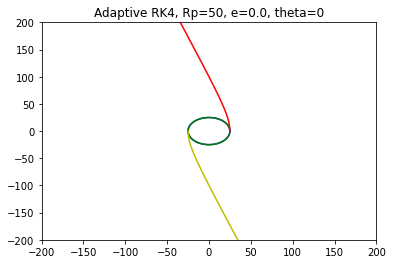

In [36]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Adaptive RK4, Rp="+str(rad0)+", e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(hyperbfns.getxtheory(theta0,ecc0,rad0/2,t,1),hyperbfns.getytheory(theta0,ecc0,rad0/2,t,1),'b')
plt.plot(hyperbfns.getxtheory(theta0,ecc0,rad0/2,t,-1),hyperbfns.getytheory(theta0,ecc0,rad0/2,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

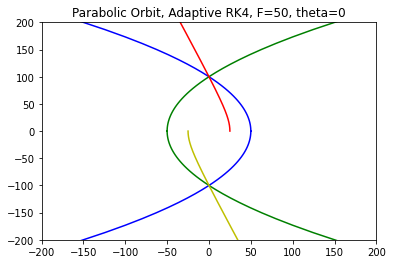

In [37]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,1),parabfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,-1),parabfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5